# Exploring travel trends on the Transport for London network 🚉

Welcome to my analysis of the average monthly temperatures on Transport for London's (TfL) tube & train network! 
This project aims to examine the patterns of travel on the Transport for London (TfL) network using [TfL open access data](http://crowding.data.tfl.gov.uk/) from 2007 to 2021. 

We'll be taking a closer look at how commuter figures across the TfL network changes over the years and what factors may be behind these trends 📈. By examining these trends, we can get an idea of which areas are under-served and make further inferences.

With that said, let's get started!

In [378]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import geopandas as gpd
import folium
import hvplot.pandas
from shapely.geometry import Point
import plotly.graph_objs as go
from plotly.subplots import make_subplots
from shapely.geometry import Point
pd.set_option('display.max_rows', None)
# pd.set_option('display.max_columns', None)

## Preprocessing 🛠️

In this first section we will work on preprocessing. This involves cleaning ✨, transforming 🔀, and organizing 📂 our data to make it more suitable for analysis.

Don't worry, if you're not into that kind of stuff, no worries! You can collapse this section with a click of a button 🤏 and move on to the next. But if you stick around, you might learn some cool things!

So if you're ready for some data magic 🔮, feel free to expand this section and learn more about the specifics of preprocessing in my project!

### Loading TFL Station ridership data

#### Loading in 2007 to 2016 Entry / Exit data

In [379]:
file_name='data/TFL Station Counts/Annual_Counts/multi-year-station-entry-and-exit-figures.xlsx'

sheet07='2007 Entry & Exit'
df2007=pd.read_excel(io=file_name, sheet_name=sheet07, skiprows=6).drop(columns=[ 
                                                                        'Weekday', 
                                                                        'Saturday', 
                                                                        'Sunday', 
                                                                        'Weekday.1', 
                                                                        'Saturday.1', 
                                                                        'Sunday.1'])
sheet08='2008 Entry & Exit'
df2008=pd.read_excel(io=file_name, sheet_name=sheet08, skiprows=6).drop(columns=[ 
                                                                        'Weekday', 
                                                                        'Saturday', 
                                                                        'Sunday', 
                                                                        'Weekday.1', 
                                                                        'Saturday.1', 
                                                                        'Sunday.1'])

sheet09='2009 Entry & Exit'
df2009=pd.read_excel(io=file_name, sheet_name=sheet09, skiprows=6).drop(columns=[ 
                                                                        'Weekday', 
                                                                        'Saturday', 
                                                                        'Sunday', 
                                                                        'Weekday.1', 
                                                                        'Saturday.1', 
                                                                        'Sunday.1'])

sheet10='2010 Entry & Exit'
df2010=pd.read_excel(io=file_name, sheet_name=sheet10, skiprows=6).drop(columns=[ 
                                                                        'Weekday', 
                                                                        'Saturday', 
                                                                        'Sunday', 
                                                                        'Weekday.1', 
                                                                        'Saturday.1', 
                                                                        'Sunday.1'])

sheet11='2011 Entry & Exit'
df2011=pd.read_excel(io=file_name, sheet_name=sheet11, skiprows=6).drop(columns=[ 
                                                                        'Weekday', 
                                                                        'Saturday', 
                                                                        'Sunday', 
                                                                        'Weekday.1', 
                                                                        'Saturday.1', 
                                                                        'Sunday.1'])

sheet12='2012 Entry & Exit'
df2012=pd.read_excel(io=file_name, sheet_name=sheet12, skiprows=6).drop(columns=[ 
                                                                        'Weekday', 
                                                                        'Saturday', 
                                                                        'Sunday', 
                                                                        'Weekday.1', 
                                                                        'Saturday.1', 
                                                                        'Sunday.1'])

sheet13='2013 Entry & Exit'
df2013=pd.read_excel(io=file_name, sheet_name=sheet13, skiprows=6).drop(columns=[ 
                                                                        'Weekday', 
                                                                        'Saturday', 
                                                                        'Sunday', 
                                                                        'Weekday.1', 
                                                                        'Saturday.1', 
                                                                        'Sunday.1'])
sheet14='2014 Entry & Exit'
df2014=pd.read_excel(io=file_name, sheet_name=sheet14, skiprows=6).drop(columns=[
                                                                        'Weekday', 
                                                                        'Saturday', 
                                                                        'Sunday', 
                                                                        'Weekday.1', 
                                                                        'Saturday.1', 
                                                                        'Sunday.1'])

sheet15='2015 Entry & Exit'
df2015=pd.read_excel(io=file_name, sheet_name=sheet15, skiprows=6).drop(columns=[  
                                                                        'Weekday', 
                                                                        'Saturday', 
                                                                        'Sunday', 
                                                                        'Weekday.1', 
                                                                        'Saturday.1', 
                                                                        'Sunday.1'])
sheet16='2016 Entry & Exit'
df2016=pd.read_excel(io=file_name, sheet_name=sheet16, skiprows=6).drop(columns=[ 
                                                                        'Weekday', 
                                                                        'Saturday', 
                                                                        'Sunday', 
                                                                        'Weekday.1', 
                                                                        'Saturday.1', 
                                                                        'Sunday.1'])
df2011.sample(5)

nlc                              Station Note    million
160  657  Northolt                                   4.279014
230  733  Tufnell Park                               3.545044
243  746  Warwick Avenue                             4.304437
259  763  Whitechapel                               12.622636
126  622  Kilburn                                    7.521454

#### Loading in 2017 Entry / Exit data

In [380]:
# Loading in TFL Station Exit & Entry Spreadsheet for 2017 
file_name =  'data/TFL Station Counts/Annual_Counts/AnnualisedEntryExit_2017.xlsx'
sheet =  'Annualised'
# Some Rows are skipped and irrelevant columns are dropped to standardize the DataFrame
df2017 = pd.read_excel(io=file_name, sheet_name=sheet, skiprows=6) 
df2017=df2017.drop(columns=['entries', 
                            'entries.1', 
                            'entries.2',
                            'Unnamed: 7',
                            'exits',
                            'exits.1',
                            'exits.2',
                            'Unnamed: 11']).round()
df2017.sample(5)

Mode   NLC   ASC              Station              Coverage  Source  \
301   LO  5362  FOHr          Forest Hill  Station entry / exit  Scaled   
83    LU   582  GHLu           Gants Hill  Station entry / exit  Relate   
162   LU   661  NWDu            Northwood  Station entry / exit  Relate   
338   LO  5424  QRPr  Queens Road Peckham  Station entry / exit  Scaled   
30    LU   530  BBBu       Bromley-by-Bow  Station entry / exit  Scaled   

         en/ex  
301  3491388.0  
83   6491292.0  
162  2897563.0  
338  1962509.0  
30   3569032.0

In [381]:
# Loading in TFL Station Exit & Entry Spreadsheet for 2017 
file_name =  'data/TFL Station Counts/Hourly_Counts/ByQhrEntryExit_2017.xlsx'
sheet =  'ByQhr'
# Some Rows are skipped and irrelevant columns are dropped to standardize the DataFrame
df2017hr = pd.read_excel(io=file_name, sheet_name=sheet, skiprows=6) 
df2017hr=df2017hr.iloc[:,0:15]
df2017hr.sample(5)

Mode   NLC   ASC                 Station              Coverage  year  \
2141   LO  6973  SJSr         St James Street  Station entry / exit  2017   
1568   LU   730  TOTu  Totteridge & Whetstone  Station entry / exit  2017   
1793   LO  6886  RMFr                 Romford  Station entry / exit  2017   
2491  DLR   890  ROAd            Royal Albert  Station entry / exit  2017   
2217   LO  5418  HPAr          Honor Oak Park  Station entry / exit  2017   

      day  dir  Total  Early       AM Peak  Inter Peak  PM Peak  Evening     \
2141  SUN   IN    703           6       95         411      128          51   
1568  SUN  OUT   1561          17       77         494      489         326   
1793  MTF  OUT   1310          27      569         271      361          74   
2491  SUN   IN   1555          26      268         857      246         112   
2217  SUN  OUT   2303           1       67         777      773         490   

      Late        
2141          12  
1568         158  
1793           8  
2491          46  
2217         195

#### Loading in 2018 Entry / Exit data


In [382]:
#Loading in TFL Station Exit & Entry Spreadsheet for 2017 
file_name =  'data/TFL Station Counts/Annual_Counts/AnnualisedEntryExit_2018.xlsx'
sheet =  'Annualised'
#Some Rows are skipped and irrelevant columns are dropped to standardize the DataFrame
df2018 = pd.read_excel(io=file_name, sheet_name=sheet, skiprows=6) 
df2018=df2018.drop(columns=['entries', 
                            'entries.1', 
                            'entries.2',
                            'entries.3',
                            'exits',
                            'exits.1',
                            'exits.2',
                            'exits.3']).round()
df2018.sample(5)

Mode   NLC   ASC            Station                 Coverage    Source  \
282   LO  1440  CMDr        Camden Road     Station entry / exit  Gateline   
374   LO  1421  WHDr  West Hampstead LO     Station entry / exit  Gateline   
154   LU   653  NACu        North Acton     Station entry / exit  Gateline   
359   LO  5437  SYDr           Sydenham  LO boarding / alighting    Scaled   
275   LO  1437  BSYr        Brondesbury     Station entry / exit  Gateline   

         en/ex  
282  5115423.0  
374  5382676.0  
154  5909108.0  
359  2907347.0  
275  3059657.0

In [383]:
# Loading in TFL Station Exit & Entry Spreadsheet for 2018 
file_name =  'data/TFL Station Counts/Hourly_Counts/ByQhrEntryExit_2018.xlsx'
sheet =  'ByQhr'
# Some Rows are skipped and irrelevant columns are dropped to standardize the DataFrame
df2018hr = pd.read_excel(io=file_name, sheet_name=sheet, skiprows=6) 
df2018hr=df2018hr.iloc[:,0:15]
df2018hr.sample(5)

Mode  NLC   ASC         Station              Coverage  year  day  dir  \
1295   LU  725   THB    Theydon Bois  Station entry / exit  2018  SAT   IN   
469    LU  707   SHR    South Harrow  Station entry / exit  2018  MTT  OUT   
42     LU  541   CYL   Chancery Lane  Station entry / exit  2018  MTT   IN   
1489   LU  645   MGT        Moorgate  Station entry / exit  2018  SAT  OUT   
1583   LU  746  WARu  Warwick Avenue  Station entry / exit  2018  SAT  OUT   

      Total  Early       AM Peak  Inter Peak  PM Peak  Evening     Late        
1295   1254          26      135         649      285          91          68  
469    3543          51      447         763     1375         656         251  
42    32653         146     1312        8499    16030        5436        1230  
1489  12685         311     2223        5465     2455        1508         723  
1583   4778          52      484        1747     1131         786         578

#### Loading in 2019 Entry / Exit data

In [384]:
# Loading in TFL Station Exit & Entry Spreadsheet for 2017 
file_name =  'data/TFL Station Counts/Annual_Counts/AnnualisedEntryExit_2019.xlsx'
sheet =  'Annualised'
# Some Rows are skipped and irrelevant columns are dropped to standardize the DataFrame
df2019 = pd.read_excel(io=file_name, sheet_name=sheet, skiprows=6) 
df2019=df2019.drop(columns=['entries', 
                            'entries.1', 
                            'entries.2',
                            'entries.3',
                            'exits',
                            'exits.1',
                            'exits.2',
                            'exits.3']).round()
df2019.sample(5)

Mode   NLC   ASC               Station              Coverage    Source  \
226   LU   728  TCRu  Tottenham Court Road  Station entry / exit  Gateline   
294   LO  1429  DLKr     Dalston Kingsland  Station entry / exit  Gateline   
160   LU   657  NHTu              Northolt  Station entry / exit  Gateline   
19    LU   787  BERu            Bermondsey  Station entry / exit  Gateline   
407  DLR   538  PDKd          Pontoon Dock  Station entry / exit       APC   

          en/ex  
226  41988765.0  
294   6415030.0  
160   4976954.0  
19    9448211.0  
407   3175895.0

In [385]:
# Loading in TFL Station Exit & Entry Spreadsheet for 2019 
file_name =  'data/TFL Station Counts/Hourly_Counts/ByQhrEntryExit_2019.xlsx'
sheet =  'ByQhr'
# Some Rows are skipped and irrelevant columns are dropped to standardize the DataFrame
df2019hr = pd.read_excel(io=file_name, sheet_name=sheet, skiprows=6) 
df2019hr=df2019hr.iloc[:,0:15]
df2019hr.sample(5)

Mode   NLC   ASC      Station              Coverage  year  day  dir  \
3402  TfLRail  6876  FOGr  Forest Gate  Station entry / exit  2019  MTT   IN   
1680       LU   571  EPKu     Elm Park  Station entry / exit  2019  SUN   IN   
3068      DLR   858  POPd       Poplar  Station entry / exit  2019  MTT   IN   
297        LU   778  BRXu   Brixton LU  Station entry / exit  2019  MTT  OUT   
546        LU   512  BALu    Balham LU  Station entry / exit  2019  FRI   IN   

      Total  Early       AM Peak  Inter Peak  PM Peak  Evening     Late        
3402   6600         868     2525        1688     1066         375          78  
1680   1607          88      284         812      270         128          25  
3068   7735         395     2728        2482     1287         618         225  
297   49567         503     5044        8618    17064       12481        5857  
546   22028        1139     9602        4733     3741        1767        1046

#### Loading in 2020 Entry / Exit data

In [386]:
# Loading in TFL Station Exit & Entry Spreadsheet for 2020 
file_name =  'data/TFL Station Counts/Annual_Counts/AC2020_AnnualisedEntryExit.xlsx'
sheet =  'Annualised'
# Some Rows are skipped and irrelevant columns are dropped to standardize the DataFrame
df2020 = pd.read_excel(io=file_name, sheet_name=sheet, skiprows=6) 
df2020=df2020.drop(columns=['Entries', 
                            'Entries.1', 
                            'Entries.2', 
                            'Entries.3', 
                            'Exits', 
                            'Exits.1', 
                            'Exits.2', 
                            'Exits.3']).round()
df2020.sample(5)

Mode   NLC   ASC            Station              Coverage    Source  \
427  EZL  3191  HANr            Hanwell  Station entry / exit    Scaled   
89    LU   674  PICu  Piccadilly Circus  Station entry / exit  Gateline   
148   LU   527  BGRu       Bounds Green  Station entry / exit  Gateline   
305   LU   713  STBu     Stamford Brook  Station entry / exit  Gateline   
378   LU   606  HDNu         Hillingdon  Station entry / exit  Gateline   

         En/Ex  
427   387664.0  
89   4175738.0  
148  2953366.0  
305  1317072.0  
378   840109.0

In [387]:
# Loading in TFL Station Exit & Entry Spreadsheet for 2020 
file_name =  'data/TFL Station Counts/Hourly_Counts/AC2020_ByQhrEntryExit.xlsx'
sheet =  'ByQhr'
# Some Rows are skipped and irrelevant columns are dropped to standardize the DataFrame
df2020hr = pd.read_excel(io=file_name, 
                         sheet_name=sheet,
                         skiprows=6).round()
convert_dict = {'Total': np.int32, 
                'Early     ': np.int32, 
                'AM Peak': np.int32, 
                'Inter Peak': np.int32, 
                'PM Peak': np.int32, 
                'Evening   ': np.int32, 
                'Late      ': np.int32}
df2020hr = df2020hr.astype(convert_dict)
df2020hr=df2020hr.iloc[:,0:15]
df2020hr.head(5)

Mode  NLC   ASC       Station              Coverage  year  day  dir  Total  \
0   LU  500  ACTu    Acton Town  Station entry / exit  2020  MTT   IN   3702   
1   LU  502  ALDu       Aldgate  Station entry / exit  2020  MTT   IN   2489   
2   LU  503  ALEu  Aldgate East  Station entry / exit  2020  MTT   IN   3198   
3   LU  505  ALPu      Alperton  Station entry / exit  2020  MTT   IN   2073   
4   LU  506  AMEu      Amersham  Station entry / exit  2020  MTT   IN    980   

   Early       AM Peak  Inter Peak  PM Peak  Evening     Late        
0         288     1101        1186      824         213          89  
1         173      520         622      920         208          46  
2         103      473        1064     1126         333          99  
3         360      668         506      409          99          31  
4         148      425         257      124          21           6

#### Loading in 2021 Entry / Exit data

In [388]:
# Loading in TFL Station Exit & Entry Spreadsheet for 2021 
file_name =  'data/TFL Station Counts/Annual_Counts/AC2021_AnnualisedEntryExit.xlsx'
sheet =  'Annualised'
# Some Rows are skipped and irrelevant columns are dropped to standardize the DataFrame
df2021 = pd.read_excel(io=file_name, sheet_name=sheet, skiprows=6) 
df2021=df2021.drop(columns=['Entries', 
                            'Entries.1', 
                            'Entries.2', 
                            'Entries.3', 
                            'Exits', 
                            'Exits.1', 
                            'Exits.2', 
                            'Exits.3']).round()
df2021.sample(5)

Mode   NLC   ASC              Station                 Coverage    Source  \
362   LO  6949  TEOr      Theobalds Grove     Station entry / exit  Gateline   
396  DLR   867  DERd          Devons Road     Station entry / exit       APC   
92    LU   591  GUNu          Gunnersbury     Station entry / exit  Gateline   
59    LU   558  DHLu          Dollis Hill     Station entry / exit  Gateline   
366   LO   742  WALu  Walthamstow Central  LO boarding / alighting    Scaled   

         En/Ex  
362   466660.0  
396  1447472.0  
92   1967487.0  
59   1865453.0  
366  2702322.0

In [389]:
# Loading in TFL Station Exit & Entry Spreadsheet for 2021 
file_name =  'data/TFL Station Counts/Hourly_Counts/AC2021_ByQhrEntryExit.xlsx'
sheet =  'ByQhr'
# Some Rows are skipped and irrelevant columns are dropped to standardize the DataFrame
df2021hr = pd.read_excel(io=file_name, sheet_name=sheet, skiprows=6).round()
convert_dict = {'Total': np.int32, 
                'Early     ': np.int32, 
                'AM Peak': np.int32, 
                'Inter Peak': np.int32, 
                'PM Peak': np.int32, 
                'Evening   ': np.int32, 
                'Late      ': np.int32}
df2021hr = df2021hr.astype(convert_dict)
df2021hr=df2021hr.iloc[:,0:15]
df2021hr.head(5)

Mode  NLC   ASC       Station              Coverage  year  day  dir  Total  \
0   LU  500  ACTu    Acton Town  Station entry / exit  2021  MTT   IN   6851   
1   LU  502  ALDu       Aldgate  Station entry / exit  2021  MTT   IN   8038   
2   LU  503  ALEu  Aldgate East  Station entry / exit  2021  MTT   IN  12751   
3   LU  505  ALPu      Alperton  Station entry / exit  2021  MTT   IN   3109   
4   LU  506  AMEu      Amersham  Station entry / exit  2021  MTT   IN   2384   

   Early       AM Peak  Inter Peak  PM Peak  Evening     Late        
0         415     2195        2017     1617         439         169  
1         213     1235        1910     3310        1044         326  
2         202     1758        3842     4344        1851         753  
3         367     1067         823      606         199          47  
4         379     1050         574      311          51          19

###### In the Hourly DFs loaded in the categories are grouped into Early, AM Peak, Inter Peak,	PM Peak,	Evening, &	Late. These categories are specified as follows: 
* 🌅 Early - 5:00 to 7:00
* ☀️ AM Peak - 7:00 to 10:00
* 🌞 Inter Peak - 10:00 to 16:00
* 🌇 PM Peak - 16:00 to 19:00
* 🌙 Evening - 19:00 to 22:00
* 🌃 Late - 22:00 to 05:00

In [390]:
# The DataDrames contain the Stations and their associated TFL mode. 
# Some stations contain multiple train modes however, so only 'unique' instances are called

print('2007', '-', '[LU]',
      df2007['Station'].nunique(),'stations') 

print('2008', '-', '[LU]', 
      df2008['Station'].nunique(),'stations') # East London Line decomissioned and joins London Overground

print('2009', '-', '[LU]',
      df2009['Station'].nunique(),'stations')

print('2010', '-', '[LU]',
      df2010['Station'].nunique(),'stations')

print('2011', '-', '[LU]',
      df2011['Station'].nunique(),'stations')

print('2012', '-', '[LU]',
      df2012['Station'].nunique(),'stations')

print('2013', '-', '[LU]',
      df2013['Station'].nunique(),'stations')

print('2014', '-', '[LU]',
      df2014['Station'].nunique(),'stations')

print('2015', '-', '[LU]',
      df2015['Station'].nunique(),'stations')

print('2016', '-', '[LU]',
      df2016['Station'].nunique(),'stations')

print('2017', '-',
      df2017['Mode'].unique(), 
      df2017['Station'].nunique(),'stations') # Data provided in prior DFs is only for London Underground
print('2018', '-',
      df2018['Mode'].unique(), 
      df2018['Station'].nunique(),'stations') # Stations opened on the TFLRail West route
print('2019', '-',
      df2019['Mode'].unique(), 
      df2019['Station'].nunique(),'stations') 
print('2020', '-',
      df2020['Mode'].unique(), 
      df2020['Station'].nunique(),'stations') # More Stations opened on the TFLRail West route
                                              # TFLRail is rebranded as the Elizabeth Line(EZL) upon completion
print('2021', '-',
      df2021['Mode'].unique(), 
      df2021['Station'].nunique(),'stations') # Nine Elms and Battersea Power Station added to the Northern Line

2007 - [LU] 273 stations
2008 - [LU] 268 stations
2009 - [LU] 268 stations
2010 - [LU] 268 stations
2011 - [LU] 268 stations
2012 - [LU] 268 stations
2013 - [LU] 268 stations
2014 - [LU] 268 stations
2015 - [LU] 268 stations
2016 - [LU] 268 stations
2017 - ['LU' 'LO' 'DLR' 'TfLRail'] 408 stations
2018 - ['LU' 'LO' 'DLR' 'TfLRail'] 416 stations
2019 - ['LU' 'LO' 'DLR' 'TfLRail'] 416 stations
2020 - ['LU' 'DLR' 'LO' 'EZL'] 426 stations
2021 - ['LU' 'LO' 'DLR' 'EZL'] 428 stations


In [391]:
pd.set_option('display.max_columns', None)

In [392]:
# For some reason, some of the column names have white space, as shown below. 
print(df2017hr.keys())
print(df2018hr.keys())
print(df2019hr.keys())
print(df2020hr.keys())
print(df2021hr.keys())

Index(['Mode', 'NLC', 'ASC', 'Station', 'Coverage', 'year', ' day', ' dir',
       'Total', 'Early     ', 'AM Peak', 'Inter Peak', 'PM Peak', 'Evening   ',
       'Late      '],
      dtype='object')
Index(['Mode', 'NLC', 'ASC', 'Station', 'Coverage', 'year', ' day', ' dir',
       'Total', 'Early     ', 'AM Peak', 'Inter Peak', 'PM Peak', 'Evening   ',
       'Late      '],
      dtype='object')
Index(['Mode', 'NLC', 'ASC', 'Station', 'Coverage', 'year', ' day', ' dir',
       'Total', 'Early     ', 'AM Peak', 'Inter Peak', 'PM Peak', 'Evening   ',
       'Late      '],
      dtype='object')
Index(['Mode', 'NLC', 'ASC', 'Station', 'Coverage', 'year', ' day', ' dir',
       'Total', 'Early     ', 'AM Peak', 'Inter Peak', 'PM Peak', 'Evening   ',
       'Late      '],
      dtype='object')
Index(['Mode', 'NLC', 'ASC', 'Station', 'Coverage', 'year', ' day', ' dir',
       'Total', 'Early     ', 'AM Peak', 'Inter Peak', 'PM Peak', 'Evening   ',
       'Late      '],
      dtype='object')


In [393]:
# To correct this, the columns are stripped of whitespace
df2017hr.columns=df2017hr.keys().str.strip()
df2018hr.columns=df2018hr.keys().str.strip()
df2019hr.columns=df2019hr.keys().str.strip()
df2020hr.columns=df2020hr.keys().str.strip()
df2021hr.columns=df2021hr.keys().str.strip()
print(df2017hr.keys())
print(df2018hr.keys())
print(df2019hr.keys())
print(df2020hr.keys())
print(df2021hr.keys())

Index(['Mode', 'NLC', 'ASC', 'Station', 'Coverage', 'year', 'day', 'dir',
       'Total', 'Early', 'AM Peak', 'Inter Peak', 'PM Peak', 'Evening',
       'Late'],
      dtype='object')
Index(['Mode', 'NLC', 'ASC', 'Station', 'Coverage', 'year', 'day', 'dir',
       'Total', 'Early', 'AM Peak', 'Inter Peak', 'PM Peak', 'Evening',
       'Late'],
      dtype='object')
Index(['Mode', 'NLC', 'ASC', 'Station', 'Coverage', 'year', 'day', 'dir',
       'Total', 'Early', 'AM Peak', 'Inter Peak', 'PM Peak', 'Evening',
       'Late'],
      dtype='object')
Index(['Mode', 'NLC', 'ASC', 'Station', 'Coverage', 'year', 'day', 'dir',
       'Total', 'Early', 'AM Peak', 'Inter Peak', 'PM Peak', 'Evening',
       'Late'],
      dtype='object')
Index(['Mode', 'NLC', 'ASC', 'Station', 'Coverage', 'year', 'day', 'dir',
       'Total', 'Early', 'AM Peak', 'Inter Peak', 'PM Peak', 'Evening',
       'Late'],
      dtype='object')


### Slicing the data by Days of the week 

#### Slicing 2017 Entry / Exit data

In [394]:
df2017hr=df2017hr.groupby(['year', 
                           'NLC', 
                           'day', 
                           'Station', 
                           'dir']).sum(numeric_only=True).reset_index()
df2017hr[df2017hr['day']=='MTF'].sum(numeric_only=True)[3:].sum()
print(df2017hr[df2017hr['day']=='MTF'].sum(numeric_only=True)[2:])

Total         11601418
Early           410606
AM Peak        3050039
Inter Peak     2880265
PM Peak        3183198
Evening        1439332
Late            637978
dtype: int64


#### Slicing 2018 Entry / Exit data

In [395]:
df2018hr=df2018hr.groupby(['year', 
                           'NLC', 
                           'day', 
                           'Station', 
                           'dir']).sum(numeric_only=True).reset_index()
df2018hr[df2018hr['day']=='MTT'].sum(numeric_only=True)[3:].sum()
print(df2018hr[df2018hr['day']=='MTT'].sum(numeric_only=True)[2:])

Total         11602754
Early           426922
AM Peak        3049475
Inter Peak     2920222
PM Peak        3194781
Evening        1430876
Late            580478
dtype: int64


#### Slicing 2019 Entry / Exit data

In [396]:
df2019hr=df2019hr.groupby(['year', 
                           'NLC', 
                           'day', 
                           'Station', 
                           'dir']).sum(numeric_only=True).reset_index()
df2019hr[df2019hr['day']=='MTT'].sum(numeric_only=True)[3:].sum()
print(df2019hr[df2019hr['day']=='MTT'].sum(numeric_only=True)[2:])

Total         11777884
Early           422622
AM Peak        3100335
Inter Peak     2971552
PM Peak        3254342
Evening        1447731
Late            581302
dtype: int64


#### Slicing 2020 Entry / Exit data

In [397]:
df2020hr=df2020hr.groupby(['year', 
                           'NLC', 
                           'day', 
                           'Station', 
                           'dir']).sum(numeric_only=True).reset_index()
df2020hr[df2020hr['day']=='MTT'].sum(numeric_only=True)[3:].sum()
print(df2020hr[df2020hr['day']=='MTT'].sum(numeric_only=True)[2:])

Total         2999545
Early          217860
AM Peak        779180
Inter Peak     829986
PM Peak        834653
Evening        266806
Late            71054
dtype: int64


#### Slicing 2021 Entry / Exit data

In [398]:
df2021hr=df2021hr.groupby(['year', 
                           'NLC', 
                           'day', 
                           'Station', 
                           'dir']).sum(numeric_only=True).reset_index()
df2021hr[df2021hr['day']=='MTT'].sum(numeric_only=True)[3:].sum()
print(df2021hr[df2021hr['day']=='MTT'].sum(numeric_only=True)[2:])

Total         7349812
Early          301384
AM Peak       1744411
Inter Peak    1979360
PM Peak       2011992
Evening        893644
Late           419004
dtype: int64


In [399]:
df2017hr.head()

year  NLC  day     Station  dir  Total  Early  AM Peak  Inter Peak  \
0  2017  500  MTF  Acton Town   IN   9531    608     3287        2705   
1  2017  500  MTF  Acton Town  OUT   9382    265     1979        1762   
2  2017  500  SAT  Acton Town   IN   6716    256     1087        2978   
3  2017  500  SAT  Acton Town  OUT   6617    147      617        1901   
4  2017  500  SUN  Acton Town   IN   4744    155      747        2438   

   PM Peak  Evening  Late  
0     2029      655   247  
1     2664     1689  1023  
2     1281      713   401  
3     1465     1226  1261  
4      821      442   141

In [400]:
dfs = [df2017hr, df2018hr, df2019hr, df2020hr, df2021hr]

# concatenating
df_mergedhr = pd.concat(dfs, axis=0, ignore_index=True)

# check the resulting data frame
df_mergedhr.sample(5)

year   NLC  day     Station  dir  Total  Early  AM Peak  Inter Peak  \
15780  2021  6970  SAT    Maryland   IN   2317    195      434         934   
14312  2021   736  FRI   Upminster   IN   5884    803     1829        1724   
5893   2019   514  SAT     Barking  OUT  23686    538     2433        8499   
9305   2020   525  FRI     Borough  OUT   1518     42      450         533   
3372   2018   616  SAT  Kennington   IN   7067    153      879        2906   

       PM Peak  Evening  Late  
15780      432      229    92  
14312     1166      275    86  
5893      5682     4092  2442  
9305       270      169    52  
3372      1344      912   873

### Grouping DFs and Standardizing formats

As the datasets have had their formats altered over the years, it is necessary for some formatting to ensure uniformity in our Dataframe.

The next cells will be doing just that to ensure we have just the data required for our analysis.

In [401]:
df_grouped2007=df2007.groupby(['nlc', 'Station'], as_index=False).sum(numeric_only=True)
df_grouped2007['million']=df_grouped2007['million']*1_000_000
df_grouped2007.rename(columns={"nlc": "NLC",
                               "million": "En/Ex 2007"}, inplace=True)
df_grouped2007.head(3)

NLC                              Station  En/Ex 2007
0  500  Acton Town                            5773625.0
1  501  Barbican                              9558748.0
2  502  Aldgate                               5572412.0

In [402]:
df_grouped2008=df2008.groupby(['nlc', 'Station'], as_index=False).sum(numeric_only=True)
df_grouped2008['million']=df_grouped2008['million']*1_000_000
df_grouped2008.rename(columns={"nlc": "NLC", 
                               "million": "En/Ex 2008"}, inplace=True)
df_grouped2008.head(3)

NLC                              Station  En/Ex 2008
0  500.0  Acton Town                            5816798.0
1  501.0  Barbican                             10030975.0
2  502.0  Aldgate                               6243135.0

In [403]:
df_grouped2009=df2009.groupby(['nlc', 'Station'], as_index=False).sum(numeric_only=True)
df_grouped2009['million']=df_grouped2009['million']*1_000_000
df_grouped2009.rename(columns={"nlc": "NLC", 
                               "million": "En/Ex 2009"}, inplace=True)
df_grouped2009.head(3)

NLC                              Station  En/Ex 2009
0  500  Acton Town                            5459521.0
1  501  Barbican                              9261249.0
2  502  Aldgate                               5974176.0

In [404]:
df_grouped2010=df2010.groupby(['nlc', 'Station'], as_index=False).sum(numeric_only=True)
df_grouped2010['million']=df_grouped2010['million']*1_000_000
df_grouped2010.rename(columns={"nlc": "NLC", 
                               "million": "En/Ex 2010"}, inplace=True)
df_grouped2010.head(3)

NLC                              Station  En/Ex 2010
0  500  Acton Town                            5428316.0
1  501  Barbican                              8873092.0
2  502  Aldgate                               6026534.0

In [405]:
df_grouped2011=df2011.groupby(['nlc', 'Station'], as_index=False).sum(numeric_only=True)
df_grouped2011['million']=df_grouped2011['million']*1_000_000
df_grouped2011.rename(columns={"nlc": "NLC", 
                               "million": "En/Ex 2011"}, inplace=True)
df_grouped2011.head(3)

NLC                              Station  En/Ex 2011
0  500  Acton Town                            5462387.0
1  501  Barbican                              9228704.0
2  502  Aldgate                               6235513.0

In [406]:
df_grouped2012=df2012.groupby(['nlc', 'Station'], as_index=False).sum(numeric_only=True)
df_grouped2012['million']=df_grouped2012['million']*1_000_000
df_grouped2012.rename(columns={"nlc": "NLC", 
                               "million": "En/Ex 2012"}, inplace=True)
df_grouped2012.head(3)

NLC                              Station  En/Ex 2012
0  500  Acton Town                            5584934.0
1  501  Barbican                              9850562.0
2  502  Aldgate                               6647283.0

In [407]:
df_grouped2013=df2013.groupby(['nlc', 'Station'], as_index=False).sum(numeric_only=True)
df_grouped2013['million']=df_grouped2013['million']*1_000_000
df_grouped2013.rename(columns={"nlc": "NLC", 
                               "million": "En/Ex 2013"}, inplace=True)
df_grouped2013.head(3)

NLC                              Station  En/Ex 2013
0  500  Acton Town                            5748994.0
1  501  Barbican                             10464425.0
2  502  Aldgate                               6877712.0

In [408]:
df_grouped2014=df2014.groupby(['nlc', 'Station'], as_index=False).sum(numeric_only=True)
df_grouped2014['million']=df_grouped2014['million']*1_000_000
df_grouped2014.rename(columns={"nlc": "NLC", 
                               "million": "En/Ex 2014"}, inplace=True)
df_grouped2014.head(3)

NLC     Station  En/Ex 2014
0  500  Acton Town   6059017.0
1  501    Barbican  11444738.0
2  502     Aldgate   7221566.0

In [409]:
df_grouped2015=df2015.groupby(['nlc', 'Station'], as_index=False).sum(numeric_only=True)
df_grouped2015['million']=df_grouped2015['million']*1_000_000
df_grouped2015.rename(columns={"nlc": "NLC", 
                               "million": "En/Ex 2015"}, inplace=True)
df_grouped2015.head(3)

NLC                              Station  En/Ex 2015
0  500  Acton Town                            6235045.0
1  501  Barbican                             11283478.0
2  502  Aldgate                               7527810.0

In [410]:
df_grouped2016=df2016.groupby(['nlc', 'Station'], as_index=False).sum(numeric_only=True)
df_grouped2016['million']=df_grouped2016['million']*1_000_000
df_grouped2016.rename(columns={"nlc": "NLC", 
                               "million": "En/Ex 2016"}, inplace=True)
df_grouped2016.head(3)

NLC                              Station  En/Ex 2016
0  500  Acton Town                            6274649.0
1  501  Barbican                             11973122.0
2  502  Aldgate                               8009494.0

In [411]:
df_grouped2017=df2017.groupby(['NLC', 'Station'], as_index=False).sum('en/ex')
df_grouped2017.rename(columns={"en/ex": "En/Ex 2017"}, inplace=True)
df_grouped2017.head(3)

NLC     Station  En/Ex 2017
0  500  Acton Town   5731527.0
1  501    Barbican  11303155.0
2  502     Aldgate   8459234.0

In [412]:
df_grouped2018=df2018.groupby(['NLC','Station'], as_index=False).sum('en/ex')
df_grouped2018.rename(columns={"en/ex": "En/Ex 2018"}, inplace=True)
df_grouped2018.head(3)

NLC     Station  En/Ex 2018
0  500  Acton Town   5794685.0
1  501    Barbican  11160091.0
2  502     Aldgate   9218140.0

In [413]:
df_grouped2019=df2019.groupby(['NLC','Station'], as_index=False).sum('en/ex')
df_grouped2019.rename(columns={"en/ex": "En/Ex 2019"}, inplace=True)
df_grouped2019.head(3)

NLC     Station  En/Ex 2019
0  500  Acton Town   6186555.0
1  501    Barbican  10467974.0
2  502     Aldgate   9956600.0

In [414]:
df_grouped2020=df2020.groupby(['NLC','Station'], as_index=False).sum('En/Ex')
df_grouped2020.rename(columns={"En/Ex": "En/Ex 2020"}, inplace=True)
df_grouped2020.head(3)

NLC     Station  En/Ex 2020
0  500  Acton Town   3568528.0
1  501    Barbican   2537108.0
2  502     Aldgate   2775844.0

In [415]:
df_grouped2021=df2021.groupby(['NLC','Station'], as_index=False).sum('En/Ex')
df_grouped2021.rename(columns={"En/Ex": "En/Ex 2021"}, inplace=True)
df_grouped2021.head(3)

NLC     Station  En/Ex 2021
0  500  Acton Town   2902697.0
1  501    Barbican   3467856.0
2  502     Aldgate   3525128.0

Now that we have all our data formatted correctly, we can merge them all.

In [416]:
# Merging all the Datasets prior to 2017
pt1 = pd.merge(
        pd.merge(
            pd.merge(
                pd.merge(
                    pd.merge(
                        pd.merge(
                            pd.merge(
                                pd.merge(
                                    pd.merge(df_grouped2007,
                                             df_grouped2008.drop(columns=['Station']),
                                             on='NLC',
                                             how='outer'),
                                    df_grouped2009.drop(columns=['Station']),
                                    on='NLC',
                                    how='outer'),
                                df_grouped2010.drop(columns=['Station']),
                                on='NLC',
                                how='outer'),
                            df_grouped2011.drop(columns=['Station']),
                            on='NLC',
                            how='outer'),
                        df_grouped2012,
                        on='NLC',
                        how='outer'),
                    df_grouped2013.drop(columns=['Station']),
                    on='NLC',
                    how='outer'),
                df_grouped2014.drop(columns=['Station']),
                on='NLC',
                how='outer'),
            df_grouped2015.drop(columns=['Station']),
            on='NLC',
            how='outer'),
        df_grouped2016.drop(columns=['Station']),
        on='NLC',
        how='outer')

In [417]:
# Merging all the Datasets post-2017.
pt2=pd.merge(
    pd.merge(
        pd.merge(
            pd.merge(df_grouped2017.drop(columns=['Station']),
                     df_grouped2018.drop(columns=['Station']),
                     on='NLC',
                     how='outer'), 
            df_grouped2019.drop(columns=['Station']),
            on='NLC',
            how='outer'),
        df_grouped2020.drop(columns=['Station']),
        on='NLC',
        how='outer'),
    df_grouped2021, # NLC is dropped in all other DFs to avoid duplicate columns
    on='NLC',
    how='outer')

In [418]:
# Merging the two merged DFs
df_merged=pd.merge(pt1, 
                   pt2,
                   on='NLC', 
                   how='outer')

In [419]:
df_merged.head()

NLC                            Station_x  En/Ex 2007  En/Ex 2008  \
0  500.0  Acton Town                            5773625.0   5816798.0   
1  501.0  Barbican                              9558748.0  10030975.0   
2  502.0  Aldgate                               5572412.0   6243135.0   
3  503.0  Aldgate East                          7657338.0   8152761.0   
4  505.0  Alperton                              3005522.0   3072270.0   

   En/Ex 2009  En/Ex 2010  En/Ex 2011                            Station_y  \
0   5459521.0   5428316.0   5462387.0  Acton Town                            
1   9261249.0   8873092.0   9228704.0  Barbican                              
2   5974176.0   6026534.0   6235513.0  Aldgate                               
3   9047885.0   8974956.0   9157483.0  Aldgate East                          
4   3044399.0   2942987.0   2945259.0  Alperton                              

   En/Ex 2012  En/Ex 2013  En/Ex 2014  En/Ex 2015  En/Ex 2016  En/Ex 2017  \
0   5584934.0   5748994.0   6059017.0   6235045.0   6274649.0   5731527.0   
1   9850562.0  10464425.0  11444738.0  11283478.0  11973122.0  11303155.0   
2   6647283.0   6877712.0   7221566.0   7527810.0   8009494.0   8459234.0   
3  10134021.0  11663144.0  12248009.0  12839311.0  13434630.0  13262408.0   
4   2893236.0   2956888.0   3171235.0   3205455.0   3174845.0   2896391.0   

   En/Ex 2018  En/Ex 2019  En/Ex 2020       Station  En/Ex 2021  
0   5794685.0   6186555.0   3568528.0    Acton Town   2902697.0  
1  11160091.0  10467974.0   2537108.0      Barbican   3467856.0  
2   9218140.0   9956600.0   2775844.0       Aldgate   3525128.0  
3  13707738.0  14148654.0   3144899.0  Aldgate East   5611130.0  
4   2796159.0   2858439.0   2064990.0      Alperton   1345253.0

In [420]:
# We would like to have the NLC column at the front of the DF, we append it to the front using this
df_merged = df_merged[['Station_x'] + [x for x in df_merged.columns if x != 'Station_x']]
df_merged = df_merged[['Station_y'] + [x for x in df_merged.columns if x != 'Station_y']]
df_merged = df_merged[['Station'] + [x for x in df_merged.columns if x != 'Station']]
df_merged = df_merged[['NLC'] + [x for x in df_merged.columns if x != 'NLC']]
df_merged.rename(columns={'Station_x': 'Station 2007',
                          'Station_y': 'Station 2012',
                          'Station': 'Station 2021'}, inplace=True, errors='raise')
df_merged['Station 2007']=df_merged['Station 2007'].str.strip()
df_merged['Station 2012']=df_merged['Station 2012'].str.strip()
df_merged.head(5)

NLC  Station 2021  Station 2012  Station 2007  En/Ex 2007  En/Ex 2008  \
0  500.0    Acton Town    Acton Town    Acton Town   5773625.0   5816798.0   
1  501.0      Barbican      Barbican      Barbican   9558748.0  10030975.0   
2  502.0       Aldgate       Aldgate       Aldgate   5572412.0   6243135.0   
3  503.0  Aldgate East  Aldgate East  Aldgate East   7657338.0   8152761.0   
4  505.0      Alperton      Alperton      Alperton   3005522.0   3072270.0   

   En/Ex 2009  En/Ex 2010  En/Ex 2011  En/Ex 2012  En/Ex 2013  En/Ex 2014  \
0   5459521.0   5428316.0   5462387.0   5584934.0   5748994.0   6059017.0   
1   9261249.0   8873092.0   9228704.0   9850562.0  10464425.0  11444738.0   
2   5974176.0   6026534.0   6235513.0   6647283.0   6877712.0   7221566.0   
3   9047885.0   8974956.0   9157483.0  10134021.0  11663144.0  12248009.0   
4   3044399.0   2942987.0   2945259.0   2893236.0   2956888.0   3171235.0   

   En/Ex 2015  En/Ex 2016  En/Ex 2017  En/Ex 2018  En/Ex 2019  En/Ex 2020  \
0   6235045.0   6274649.0   5731527.0   5794685.0   6186555.0   3568528.0   
1  11283478.0  11973122.0  11303155.0  11160091.0  10467974.0   2537108.0   
2   7527810.0   8009494.0   8459234.0   9218140.0   9956600.0   2775844.0   
3  12839311.0  13434630.0  13262408.0  13707738.0  14148654.0   3144899.0   
4   3205455.0   3174845.0   2896391.0   2796159.0   2858439.0   2064990.0   

   En/Ex 2021  
0   2902697.0  
1   3467856.0  
2   3525128.0  
3   5611130.0  
4   1345253.0

In merging these datasets, we notice that many values are not present in the Station name columns. A few NaN values shown below are present in the 'Station 2021' column.

In [421]:
df_merged[df_merged['Station 2021'].isnull()]

NLC Station 2021 Station 2012    Station 2007  En/Ex 2007  En/Ex 2008  \
142  651.0          NaN          NaN       New Cross   2272307.0         NaN   
143  652.0          NaN          NaN  New Cross Gate   3563251.0         NaN   
178  689.0          NaN          NaN     Rotherhithe   1293908.0         NaN   
188  699.0          NaN          NaN        Shadwell   1787127.0         NaN   
190  701.0          NaN          NaN      Shoreditch         0.0         NaN   
211  722.0          NaN          NaN    Surrey Quays   2455871.0         NaN   
232  744.0          NaN          NaN         Wapping   1560851.0         NaN   

     En/Ex 2009  En/Ex 2010  En/Ex 2011  En/Ex 2012  En/Ex 2013  En/Ex 2014  \
142         NaN         NaN         NaN         NaN         NaN         NaN   
143         NaN         NaN         NaN         NaN         NaN         NaN   
178         NaN         NaN         NaN         NaN         NaN         NaN   
188         NaN         NaN         NaN         NaN         NaN         NaN   
190         NaN         NaN         NaN         NaN         NaN         NaN   
211         NaN         NaN         NaN         NaN         NaN         NaN   
232         NaN         NaN         NaN         NaN         NaN         NaN   

     En/Ex 2015  En/Ex 2016  En/Ex 2017  En/Ex 2018  En/Ex 2019  En/Ex 2020  \
142         NaN         NaN         NaN         NaN         NaN         NaN   
143         NaN         NaN         NaN         NaN         NaN         NaN   
178         NaN         NaN         NaN         NaN         NaN         NaN   
188         NaN         NaN         NaN         NaN         NaN         NaN   
190         NaN         NaN         NaN         NaN         NaN         NaN   
211         NaN         NaN         NaN         NaN         NaN         NaN   
232         NaN         NaN         NaN         NaN         NaN         NaN   

     En/Ex 2021  
142         NaN  
143         NaN  
178         NaN  
188         NaN  
190         NaN  
211         NaN  
232         NaN

##### Notes:
As the East London Line was absorbed to the London Overground East section, the following amendments were made:
* *New Cross, New Cross Gate, Rotherhithe, Shadwell, Surrey Quays, and Wapping* station was closed from 2007 to 2010 and converted to the London Overground
* *Shoreditch* station was permanently closed after June 2006 and was later replaced by *Shoreditch High Street* station 

These were all part of the [transfer of Silverlink's Metro lines to Transport for London](https://www.ealingtimes.co.uk/news/1782035.tfl-to-take-on-rail-network/) under the London Overground banner.

In [422]:
df_merged.at[142,'Station 2021'] = 'New Cross'
df_merged.at[143,'Station 2021'] = 'New Cross Gate'
df_merged.at[178,'Station 2021'] = 'Rotherhithe'
df_merged.at[188,'Station 2021'] = 'Shadwell'
df_merged.at[190,'Station 2021'] = 'Shoreditch' 
df_merged.at[211,'Station 2021'] = 'Surrey Quays'
df_merged.at[232,'Station 2021'] = 'Wapping'

##### Note:
All these stations from the East London line were either permanently closed or underwent considerable reconstruction and became part of the London Overground under a new NLC.

For example, we can look at New Cross & New Cross Gate:

In [423]:
# define value to search for
str_pattern = 'New Cross'

# row by row check for the string pattern in the row values
filt = (df_merged
.apply(lambda r: r.astype('string').str.contains(str_pattern)
.any(), axis=1))

df_merged.drop(columns=['Station 2007', 'Station 2012'])[filt]

NLC    Station 2021  En/Ex 2007  En/Ex 2008  En/Ex 2009  En/Ex 2010  \
142   651.0       New Cross   2272307.0         NaN         NaN         NaN   
143   652.0  New Cross Gate   3563251.0         NaN         NaN         NaN   
348  5150.0       New Cross         NaN         NaN         NaN         NaN   
350  5345.0  New Cross Gate         NaN         NaN         NaN         NaN   

     En/Ex 2011  En/Ex 2012  En/Ex 2013  En/Ex 2014  En/Ex 2015  En/Ex 2016  \
142         NaN         NaN         NaN         NaN         NaN         NaN   
143         NaN         NaN         NaN         NaN         NaN         NaN   
348         NaN         NaN         NaN         NaN         NaN         NaN   
350         NaN         NaN         NaN         NaN         NaN         NaN   

     En/Ex 2017  En/Ex 2018  En/Ex 2019  En/Ex 2020  En/Ex 2021  
142         NaN         NaN         NaN         NaN         NaN  
143         NaN         NaN         NaN         NaN         NaN  
348   2784006.0   2660707.0   2655302.0   1492538.0   1532792.0  
350   6886621.0   5850998.0   5606001.0   2076254.0   2724966.0

We can now drop the other station name columns since we no longer need them.

In [424]:
df_merged.drop(columns=['Station 2007', 'Station 2012'], inplace=True)
df_merged.rename(columns={"Station 2021": "Station"}, inplace=True)

Finally, it would be helpful to know which lines go through these stations. To do this, we will load in a dataset containing all the TfL lines passing through each station and merge it.

In [425]:
# Here is a dataframe with the line and network information of all Stations on the TfL network
df_lines = pd.read_csv('data/Geodata/Stations_20220221.csv').drop(columns=['EASTING','NORTHING','Zone','x','y'])
df_lines.sample(5)

NLC             NAME                       LINES             NETWORK  \
207   606       Hillingdon    Metropolitan, Piccadilly  London Underground   
44   9459  Blackhorse Lane                    Tramlink            Tramlink   
377   697       St. Paul's                     Central  London Underground   
413   738            Upney                    District  London Underground   
245   630     Latimer Road  Hammersmith & City, Circle  London Underground   

    London Underground Elizabeth Line London Overground  DLR  
207                Yes            NaN               NaN  NaN  
44                 NaN            NaN               NaN  NaN  
377                Yes            NaN               NaN  NaN  
413                Yes            NaN               NaN  NaN  
245                Yes            NaN               NaN  NaN

In [426]:
# Now we can create a Dataframe with the station, its entry/exit data and its line and network information.
df_stations=pd.merge(df_merged,
                     df_lines, 
                     on='NLC', 
                     how='left' # Left merge since not all the stations in df_lines are in our df_merged dataset
                    ).drop(columns='NAME')
df_stations.sample(5)

NLC           Station  En/Ex 2007  En/Ex 2008  En/Ex 2009  En/Ex 2010  \
225  737.0  Upminster Bridge    781195.0    934057.0    865150.0    888847.0   
127  635.0  London Bridge LU  56954458.0  60551773.0  61494909.0  60787026.0   
125  633.0       Leytonstone   9444787.0   9855499.0   9699503.0   9794737.0   
283  842.0  Canary Wharf DLR         NaN         NaN         NaN         NaN   
19   520.0  Bethnal Green LU  14095386.0  14272056.0  15110104.0  15059643.0   

     En/Ex 2011  En/Ex 2012  En/Ex 2013  En/Ex 2014  En/Ex 2015  En/Ex 2016  \
225    988524.0   1098183.0   1103760.0   1142293.0   1146772.0   1159376.0   
127  65444278.0  67155180.0  69884482.0  74976665.0  71964428.0  70735683.0   
125  10452827.0  10102833.0  10379073.0  11054539.0  11244737.0  11300919.0   
283         NaN         NaN         NaN         NaN         NaN         NaN   
19   15086509.0  15055906.0  15272389.0  16076636.0  16164737.0  16272340.0   

     En/Ex 2017  En/Ex 2018  En/Ex 2019  En/Ex 2020  En/Ex 2021  \
225   1096940.0   1153892.0   1107953.0    786733.0    507765.0   
127  65684647.0  70676629.0  74343494.0  24721911.0  30857082.0   
125  10431470.0   9744447.0   9822700.0   5650715.0   4259419.0   
283  18007670.0  18160599.0  18319463.0   4222389.0   6634865.0   
19   14720488.0  14171711.0  14920047.0   6849607.0   6322604.0   

                 LINES             NETWORK London Underground Elizabeth Line  \
225           District  London Underground                Yes            NaN   
127  Northern, Jubilee  London Underground                Yes            NaN   
125            Central  London Underground                Yes            NaN   
283                DLR                 NaN                NaN            NaN   
19             Central  London Underground                Yes            NaN   

    London Overground  DLR  
225               NaN  NaN  
127               NaN  NaN  
125               NaN  NaN  
283               NaN  Yes  
19                NaN  NaN

In [427]:
print(df_stations.shape)
df_stations.sample(5)

(436, 23)


NLC           Station  En/Ex 2007  En/Ex 2008  En/Ex 2009  En/Ex 2010  \
121  629.0    Lancaster Gate   5720495.0   5972880.0   6481688.0   6524718.0   
168  679.0        Queensbury   3192282.0   3206121.0   3193258.0   2981736.0   
77   583.0   Gloucester Road  13606370.0  13523413.0  13734309.0  14484620.0   
188  699.0          Shadwell   1787127.0         NaN         NaN         NaN   
171  682.0  Ravenscourt Park   2590358.0   2622796.0   2502619.0   2520547.0   

     En/Ex 2011  En/Ex 2012  En/Ex 2013  En/Ex 2014  En/Ex 2015  En/Ex 2016  \
121   6677557.0   6698842.0   6794600.0   6551701.0   6293475.0   7060983.0   
168   3175666.0   3372174.0   3853332.0   4195103.0   4525278.0   4675024.0   
77   14162419.0  14193918.0  14912967.0  11963929.0  14203922.0  13975040.0   
188         NaN         NaN         NaN         NaN         NaN         NaN   
171   2647871.0   2754691.0   2767420.0   2907957.0   3189008.0   3178278.0   

     En/Ex 2017  En/Ex 2018  En/Ex 2019  En/Ex 2020  En/Ex 2021  \
121   5903385.0   6140949.0   6628043.0   1503898.0   2668131.0   
168   4416312.0   4173051.0   4114533.0   2855288.0   1835750.0   
77   13100020.0  13311849.0  13738684.0   3933949.0   6967643.0   
188         NaN         NaN         NaN         NaN         NaN   
171   3055656.0   3087532.0   3228328.0   1921494.0   1533828.0   

                            LINES             NETWORK London Underground  \
121                       Central  London Underground                Yes   
168                       Jubilee  London Underground                Yes   
77   District, Piccadilly, Circle  London Underground                Yes   
188                           NaN                 NaN                NaN   
171                      District  London Underground                Yes   

    Elizabeth Line London Overground  DLR  
121            NaN               NaN  NaN  
168            NaN               NaN  NaN  
77             NaN               NaN  NaN  
188            NaN               NaN  NaN  
171            NaN               NaN  NaN

## Data analysis & visualization

Now our Dataframe is complete!

In [428]:
df_stations.to_csv("output/stations.csv") # Saves our dataframe to the output folder
df_stations.sample(5)

NLC        Station  En/Ex 2007  En/Ex 2008  En/Ex 2009  En/Ex 2010  \
385  6947.0      Southbury         NaN         NaN         NaN         NaN   
388  6954.0    Wood Street         NaN         NaN         NaN         NaN   
158   669.0  Oxford Circus  72046333.0  72914886.0  72719762.0  70122354.0   
188   699.0       Shadwell   1787127.0         NaN         NaN         NaN   
273   599.0      Wood Lane         NaN   3820056.0   3099767.0   3349472.0   

     En/Ex 2011  En/Ex 2012  En/Ex 2013  En/Ex 2014  En/Ex 2015  En/Ex 2016  \
385         NaN         NaN         NaN         NaN         NaN         NaN   
388         NaN         NaN         NaN         NaN         NaN         NaN   
158  77092776.0  80551504.0  85246928.0  98511630.0  92355623.0  83258977.0   
188         NaN         NaN         NaN         NaN         NaN         NaN   
273   3437870.0   3651658.0   3444011.0   3982886.0   3698414.0   3678778.0   

     En/Ex 2017  En/Ex 2018  En/Ex 2019  En/Ex 2020  En/Ex 2021  \
385   1271810.0   1138676.0   1175370.0    615296.0    693974.0   
388   1422045.0   1781513.0   1862285.0    947291.0   1242080.0   
158  79778619.0  73639833.0  78073457.0  14598777.0  32863152.0   
188         NaN         NaN         NaN         NaN         NaN   
273   3804000.0   4524340.0   4739497.0   1359848.0   2194795.0   

                           LINES             NETWORK London Underground  \
385            London Overground                 NaN                NaN   
388            London Overground                 NaN                NaN   
158  Central, Bakerloo, Victoria  London Underground                Yes   
188                          NaN                 NaN                NaN   
273   Hammersmith & City, Circle  London Underground                Yes   

    Elizabeth Line London Overground  DLR  
385            NaN               Yes  NaN  
388            NaN               Yes  NaN  
158            NaN               NaN  NaN  
188            NaN               NaN  NaN  
273            NaN               NaN  NaN

If you skipped the previous section, I have merged all the datasets into one dataframe containing all Entry & Exit data from 2007 to 2021. In this next section, we will use this data to analyse and visualise trends in travel on the TfL network. 

But first...

### A brief detour to discuss the Station NLC codes

As you may know, we have the issue of some TfL stations having the same or very similar names. Even more confusingly, some stations have different terminals within the same station classified under different NLC codes. 

For the purpose of this analysis, we will treat stations with *different* NLC codes as being *distinct*. Below I have shown a couple stations which illustrate the point I am making.

**Canary Wharf, which has two¹ stations, in separate buildings under different NLC codes.** 

¹ - The Canary Wharf EL station, shown in the map below is not present in the dataframe, as it only opened in May 2022.

![image](https://visitbytrain.info/maps/canarywharf.gif)

In [429]:
# define value to search for
str_pattern = 'Canary Wharf'

# row by row check for the string pattern in the row values
filt = (df_stations
.apply(lambda r: r.astype('string').str.contains(str_pattern)
.any(), axis=1))

df_stations[filt]

NLC           Station  En/Ex 2007  En/Ex 2008  En/Ex 2009  En/Ex 2010  \
271  852.0   Canary Wharf LU  41622702.0  43509642.0  39616440.0  41526306.0   
283  842.0  Canary Wharf DLR         NaN         NaN         NaN         NaN   

     En/Ex 2011  En/Ex 2012  En/Ex 2013  En/Ex 2014  En/Ex 2015  En/Ex 2016  \
271  46590009.0  48043044.0  50046631.0  51809003.0  54441424.0  54785734.0   
283         NaN         NaN         NaN         NaN         NaN         NaN   

     En/Ex 2017  En/Ex 2018  En/Ex 2019  En/Ex 2020  En/Ex 2021    LINES  \
271  48576019.0  49813792.0  47685725.0  13355134.0  18288802.0  Jubilee   
283  18007670.0  18160599.0  18319463.0   4222389.0   6634865.0      DLR   

                NETWORK London Underground Elizabeth Line London Overground  \
271  London Underground                Yes            NaN               NaN   
283                 NaN                NaN            NaN               NaN   

     DLR  
271  NaN  
283  Yes

**Bank and Monument are linked via underground interchange and are considered one station under one NLC code.**

![Bank and Monument Stations](https://substackcdn.com/image/fetch/w_1456,c_limit,f_webp,q_auto:good,fl_progressive:steep/https%3A%2F%2Fbucketeer-e05bbc84-baa3-437e-9518-adb32be77984.s3.amazonaws.com%2Fpublic%2Fimages%2F1e6c6e4c-305e-478e-9dea-903e650f5d80_400x457.png)

In [430]:
# define value to search for
str_pattern = 'Bank and Monument'

# row by row check for the string pattern in the row values
filt = (df_stations
.apply(lambda r: r.astype('string').str.contains(str_pattern)
.any(), axis=1))

df_stations[filt]

NLC            Station  En/Ex 2007  En/Ex 2008  En/Ex 2009  En/Ex 2010  \
12  513.0  Bank and Monument  41882819.0  42823864.0  40655415.0  43495766.0   

    En/Ex 2011  En/Ex 2012  En/Ex 2013  En/Ex 2014  En/Ex 2015  En/Ex 2016  \
12  47804941.0  47749950.0  48884756.0  52306067.0  57512971.0  64262200.0   

    En/Ex 2017  En/Ex 2018  En/Ex 2019  En/Ex 2020  En/Ex 2021  \
12  90922111.0  86393639.0  92291003.0  15625280.0  30132853.0   

                                                LINES             NETWORK  \
12  Waterloo & City, Northern, Central, District, ...  London Underground   

   London Underground Elizabeth Line London Overground  DLR  
12                Yes            NaN               NaN  Yes

**Euston, which has the Euston LU & Euston NR terminals, in the *same*  building under different NLC codes. Also, Euston Square, which is only a few minutes away.**

In [431]:
# define value to search for
str_pattern = 'Euston '

# row by row check for the string pattern in the row values
filt = (df_stations
.apply(lambda r: r.astype('string').str.contains(str_pattern)
.any(), axis=1))

df_stations[filt]

NLC        Station  En/Ex 2007  En/Ex 2008  En/Ex 2009  En/Ex 2010  \
68    574.0      Euston LU  25783341.0  28125051.0  31123724.0  33573987.0   
69    575.0  Euston Square   9958819.0  10584757.0  10709239.0  10030805.0   
340  1444.0      Euston NR         NaN         NaN         NaN         NaN   

     En/Ex 2011  En/Ex 2012  En/Ex 2013  En/Ex 2014  En/Ex 2015  En/Ex 2016  \
68   35324569.0  37526909.0  38026531.0  41331265.0  42159332.0  43099154.0   
69   10885783.0  11358790.0  12358617.0  14328440.0  14878866.0  14395409.0   
340         NaN         NaN         NaN         NaN         NaN         NaN   

     En/Ex 2017  En/Ex 2018  En/Ex 2019  En/Ex 2020  En/Ex 2021  \
68   40735345.0  39254276.0  41092380.0   8794406.0  15882123.0   
69   13495131.0  13858401.0  14119388.0   3668927.0   5263980.0   
340   3561954.0   3652046.0   4125202.0   1420814.0   2116277.0   

                                        LINES             NETWORK  \
68                         Northern, Victoria  London Underground   
69   Metropolitan, Circle, Hammersmith & City  London Underground   
340                         London Overground                 NaN   

    London Underground Elizabeth Line London Overground  DLR  
68                 Yes            NaN               NaN  NaN  
69                 Yes            NaN               NaN  NaN  
340                NaN            NaN               Yes  NaN

**Liverpool Street, which has the LU &  NR terminals, in the *same*  building under different NLC codes.**

In [432]:
# define value to search for
str_pattern = 'Liverpool '

# row by row check for the string pattern in the row values
filt = (df_stations
.apply(lambda r: r.astype('string').str.contains(str_pattern)
.any(), axis=1))

df_stations[filt]

NLC              Station  En/Ex 2007  En/Ex 2008  En/Ex 2009  \
126   634.0  Liverpool Street LU  61317307.0  64161950.0  60907538.0   
394  6965.0  Liverpool Street NR         NaN         NaN         NaN   

     En/Ex 2010  En/Ex 2011  En/Ex 2012  En/Ex 2013  En/Ex 2014  En/Ex 2015  \
126  62721399.0  63645304.0  64234700.0  67893591.0  73661457.0  73257321.0   
394         NaN         NaN         NaN         NaN         NaN         NaN   

     En/Ex 2016  En/Ex 2017  En/Ex 2018  En/Ex 2019  En/Ex 2020  En/Ex 2021  \
126  71614231.0  64501949.0  66141465.0  67202755.0  16267905.0  26596893.0   
394         NaN  28427447.0  29893382.0  32248118.0  12114962.0  16460908.0   

                                                 LINES             NETWORK  \
126  Metropolitan, Central, Circle, Hammersmith & C...  London Underground   
394                                           TfL Rail                 NaN   

    London Underground Elizabeth Line London Overground  DLR  
126                Yes            NaN               Yes  NaN  
394                NaN            Yes               NaN  NaN

**Heathrow, which has the LU &  NR terminals for its own individual airport terminals, in the *same*  building under different NLC codes**

In [433]:
# define value to search for
str_pattern = 'Heathrow'

# row by row check for the string pattern in the row values
filt = (df_stations
.apply(lambda r: r.astype('string').str.contains(str_pattern)
.any(), axis=1))

df_stations[filt]

NLC                      Station  En/Ex 2007  En/Ex 2008  En/Ex 2009  \
265   780.0    Heathrow Terminals 123 LU   9307489.0   8093307.0   8269094.0   
266   781.0       Heathrow Terminal 4 LU   2110256.0   1173324.0   1767759.0   
274   783.0       Heathrow Terminal 5 LU         NaN   3138596.0   2982239.0   
422  7090.0  Heathrow Terminals 2 & 3 EL         NaN         NaN         NaN   
423  7091.0       Heathrow Terminal 4 EL         NaN         NaN         NaN   
433  9846.0       Heathrow Terminal 5 EL         NaN         NaN         NaN   

     En/Ex 2010  En/Ex 2011  En/Ex 2012  En/Ex 2013  En/Ex 2014  En/Ex 2015  \
265   7955415.0   7720762.0   7796187.0   8143722.0   4222451.0   7489313.0   
266   2142085.0   2459358.0   2436725.0   2427793.0   7655649.0   2347501.0   
274   3143925.0   3211111.0   3639976.0   4047773.0   2125674.0   3902026.0   
422         NaN         NaN         NaN         NaN         NaN         NaN   
423         NaN         NaN         NaN         NaN         NaN         NaN   
433         NaN         NaN         NaN         NaN         NaN         NaN   

     En/Ex 2016  En/Ex 2017  En/Ex 2018  En/Ex 2019  En/Ex 2020  En/Ex 2021  \
265   7731054.0   7318073.0   7346448.0   7881446.0   1859318.0   2452747.0   
266   2278746.0   2146778.0   2127743.0   2125220.0         0.0         0.0   
274   4452155.0   4247920.0   4178801.0   4476640.0   1173177.0   2027837.0   
422         NaN         NaN   1436239.0   1664708.0    129339.0    723162.0   
423         NaN         NaN   1420311.0   1426266.0         0.0         0.0   
433         NaN         NaN         NaN         NaN    668011.0    260928.0   

          LINES             NETWORK London Underground Elizabeth Line  \
265  Piccadilly  London Underground                Yes            NaN   
266  Piccadilly  London Underground                Yes            NaN   
274  Piccadilly  London Underground                Yes            NaN   
422    TfL Rail                 NaN                NaN            Yes   
423    TfL Rail                 NaN                NaN            Yes   
433    TfL Rail                 NaN                NaN            Yes   

    London Overground  DLR  
265               NaN  NaN  
266               NaN  NaN  
274               NaN  NaN  
422               NaN  NaN  
423               NaN  NaN  
433               NaN  NaN

**Paddington, which has the LU & NR terminals in the *same* building under different NLC codes**

In [434]:
# define value to search for
str_pattern = 'Paddington '

# row by row check for the string pattern in the row values
filt = (df_stations
.apply(lambda r: r.astype('string').str.contains(str_pattern)
.any(), axis=1))

df_stations[filt]

NLC         Station  En/Ex 2007  En/Ex 2008  En/Ex 2009  En/Ex 2010  \
159   670.0  Paddington TfL  37237088.0  40703979.0  42024813.0  43995091.0   
416  3087.0   Paddington NR         NaN         NaN         NaN         NaN   

     En/Ex 2011  En/Ex 2012  En/Ex 2013  En/Ex 2014  En/Ex 2015  En/Ex 2016  \
159  46478735.0  46325618.0  49710749.0  49283385.0  49637302.0  49480436.0   
416         NaN         NaN         NaN         NaN         NaN         NaN   

     En/Ex 2017  En/Ex 2018  En/Ex 2019  En/Ex 2020  En/Ex 2021  \
159  46331280.0  47011593.0  48612110.0  11420070.0  20437217.0   
416         NaN   4086849.0   4722949.0   5977071.0   8513238.0   

                  LINES             NETWORK London Underground Elizabeth Line  \
159  Hammersmith & City  London Underground                Yes            NaN   
416            TfL Rail                 NaN                NaN            Yes   

    London Overground  DLR  
159               NaN  NaN  
416               NaN  NaN

**Shepherd's Bush, which has the LU & NR terminals in the *same* building under different NLC codes**

In [435]:
# define value to search for
str_pattern = 'Shepherd'

# row by row check for the string pattern in the row values
filt = (df_stations
.apply(lambda r: r.astype('string').str.contains(str_pattern)
.any(), axis=1))

df_stations[filt]

NLC                 Station  En/Ex 2007  En/Ex 2008  En/Ex 2009  \
189   700.0      Shepherd's Bush LU  12136319.0  20725029.0  18962171.0   
260   775.0  Shepherd's Bush Market   3418678.0   3583638.0   2959686.0   
414  9587.0      Shepherd's Bush NR         NaN         NaN         NaN   

     En/Ex 2010  En/Ex 2011  En/Ex 2012  En/Ex 2013  En/Ex 2014  En/Ex 2015  \
189  21707878.0  21594508.0  21896486.0  22872181.0  22869844.0  22257246.0   
260   2874893.0   2999644.0   3257388.0   3438569.0   3662770.0   3412590.0   
414         NaN         NaN         NaN         NaN         NaN         NaN   

     En/Ex 2016  En/Ex 2017  En/Ex 2018  En/Ex 2019  En/Ex 2020  En/Ex 2021  \
189  22848359.0  21410922.0  19408053.0  20081602.0   6283854.0   7584135.0   
260   3569302.0   3530961.0   3426693.0   3375980.0   1499390.0   1656236.0   
414         NaN   8458803.0   8230210.0   8312280.0   2900189.0   4551302.0   

                          LINES             NETWORK London Underground  \
189                     Central  London Underground                Yes   
260  Hammersmith & City, Circle  London Underground                Yes   
414           London Overground                 NaN                NaN   

    Elizabeth Line London Overground  DLR  
189            NaN               NaN  NaN  
260            NaN               NaN  NaN  
414            NaN               Yes  NaN

##### Later, we could catergorize all stations which can reasonably be considered to be the same station as a single entity to get a broader idea of travel in London (for example, Euston NR & Euston LU).  
But for now, on to making cool graphs!

### Exploratory Data Analysis

Now that we have our Data ready, we can see how travel on the TfL is trending. 
###### Note: 
*It is worth noting that prior to 2017, the data **only** includes data for the London Underground (i.e The London Overground, DLR & Elizabeth Line are not accounted for)*

#### Annual Count data

**Presented below is the Transport for London Entry & Exit figures over the years**

In [436]:
df_stations[["En/Ex 2007",
             "En/Ex 2008",
             "En/Ex 2009",
             "En/Ex 2010",
             "En/Ex 2011",
             "En/Ex 2012",
             "En/Ex 2013",
             "En/Ex 2014",
             "En/Ex 2015", 
             "En/Ex 2016", # Remember, the Datasets prior to 2017 ONLY contains London Underground data 
             "En/Ex 2017",
             "En/Ex 2018",
             "En/Ex 2019",
             "En/Ex 2020",
             "En/Ex 2021"]].sum(axis=0).hvplot(kind='bar',
                                             title='Transport for London Entry & Exit figures over the years',
                                             xlabel='Period',
                                             frame_width=800,
                                             frame_height=400,
                                             ylabel='Figures (in Billions)', 
                                             rot=45)
# Below is the number of Entries & Exits for 2007 to 2021. 

:Bars   [index]   (0)

**Presented below is the Transport for London Entry & Exit figures over the years**

In [437]:
fig = make_subplots(rows=15, cols=1, 
                    shared_xaxes=True, 
                    vertical_spacing=0.005)

for i in range(2007, 2022):
    fig.add_trace(go.Bar(y=df_stations.sort_values(f'En/Ex {i}', ascending=False)['Station'].head(10), 
                         x=df_stations.sort_values(f'En/Ex {i}', ascending=False)[f'En/Ex {i}'].head(10),
                         orientation='h', name=f'En/Ex {i}'),
                  row=i-2006, col=1)
    fig.update_xaxes(side='bottom')
    fig.update_yaxes({"categoryorder":"total ascending"})

# fig.update_layout(height=3000,
#                   width=1000)

fig.update_layout(
    title={
        'text': "Top 10 Stations by Entry/Exit per Year (2007-2021)",
        'x': 0.5, # Center the title
        'y': 0.98, # Set the y position of the title
        'xanchor': 'center', # Center the title horizontally
        'yanchor': 'top' # Anchor the title to the top of the figure
    },
    height=3000,
    width=1000,
    plot_bgcolor='whitesmoke'
)


fig.show()

### Annual Count data *by period*

On a smaller scale, we can view the periodic breakdowns of Entry and Exit data.

**Presented below is the Transport for London Entry & Exit figures, by time period, over the years**

These graphs are further classified by Days of the week giving:
- Monday to Thursday
- Friday
- Saturday
- Sunday

***Reminder:***
    
The periodic categories are specified as follows:
* 🌅 Early - 5:00 to 7:00
* ☀️ AM Peak - 7:00 to 10:00
* 🌞 Inter Peak - 10:00 to 16:00
* 🌇 PM Peak - 16:00 to 19:00
* 🌙 Evening - 19:00 to 22:00
* 🌃 Late - 22:00 to 05:00

#### Monday to Thursday

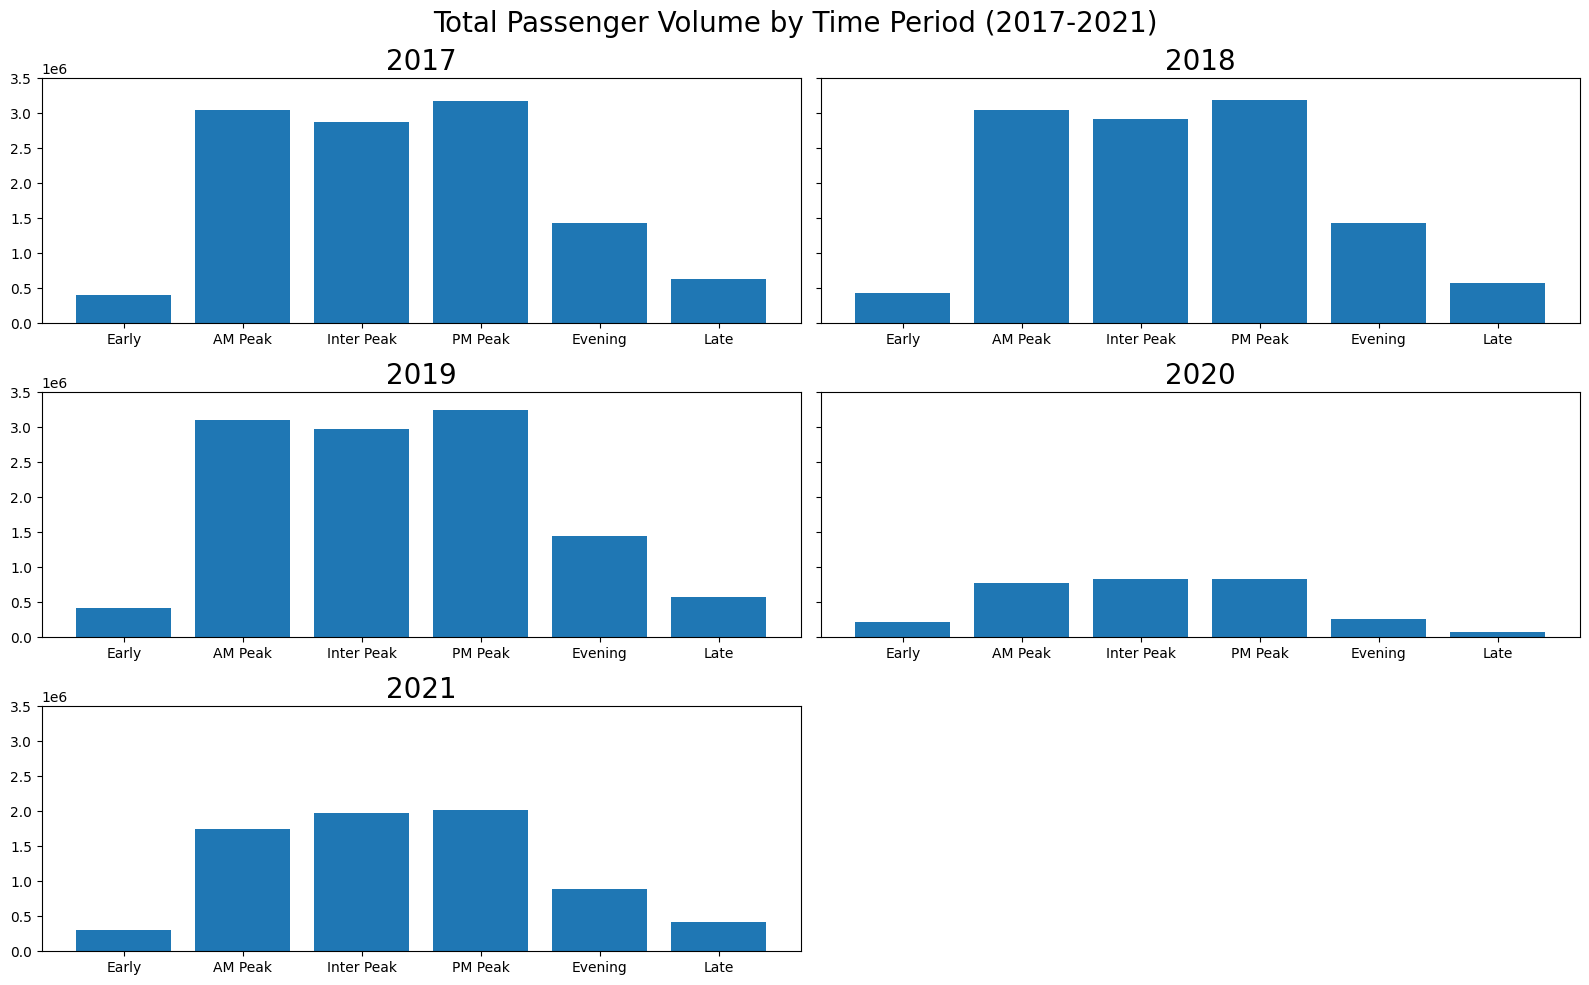

In [438]:
figure, axis = plt.subplots(3, 2, figsize=(16,10), sharey=True,  tight_layout=True)
labels=['Early', 'AM Peak', 'Inter Peak', 'PM Peak', 'Evening', 'Late']
startangle=270
explode=(0.02, 0.02, 0.02, 0.02, 0.02, 0.02)
autopct='%1.2f%%'
fontsize=20

# Bar Chart Breakdown
# axis[1].bar(height=df2021hr[df2021hr['day']=='MTT'].sum(numeric_only=True)[3:].to_list(),
#             x=['Early', 'AM Peak', 'Inter Peak', 'PM Peak', 'Evening', 'Late'])
# axis[1].set_title("Bar Chart Breakdown");
# axis[1].set_ylim(0, 3_500_000); # added line to set y limit

axis[0, 0].bar(height=df2017hr[df2017hr['day']=='MTF'].sum(numeric_only=True)[3:].to_list(), 
               x=['Early', 'AM Peak', 'Inter Peak', 'PM Peak', 'Evening', 'Late'])
axis[0, 0].set_title("2017", fontdict={'fontsize': fontsize});

axis[0, 1].bar(height=df2018hr[df2018hr['day']=='MTT'].sum(numeric_only=True)[3:].to_list(), 
               x=['Early', 'AM Peak', 'Inter Peak', 'PM Peak', 'Evening', 'Late'])
axis[0, 1].set_title("2018", fontdict={'fontsize': fontsize});

axis[1, 0].bar(height=df2019hr[df2019hr['day']=='MTT'].sum(numeric_only=True)[3:].to_list(), 
               x=['Early', 'AM Peak', 'Inter Peak', 'PM Peak', 'Evening', 'Late'])
axis[1, 0].set_title("2019", fontdict={'fontsize': fontsize});

axis[1, 1].bar(height=df2020hr[df2020hr['day']=='MTT'].sum(numeric_only=True)[3:].to_list(), 
               x=['Early', 'AM Peak', 'Inter Peak', 'PM Peak', 'Evening', 'Late'])
axis[1, 1].set_title("2020", fontdict={'fontsize': fontsize});

axis[2, 0].bar(height=df2021hr[df2021hr['day']=='MTT'].sum(numeric_only=True)[3:].to_list(), 
               x=['Early', 'AM Peak', 'Inter Peak', 'PM Peak', 'Evening', 'Late'])
axis[2, 0].set_title("2021", fontdict={'fontsize': fontsize});

axis[0,0].set_ylim(0, 3_500_000)
axis[0,1].set_ylim(0, 3_500_000)
axis[1,0].set_ylim(0, 3_500_000)
axis[1,1].set_ylim(0, 3_500_000)
axis[2,0].set_ylim(0, 3_500_000)

figure.suptitle("Total Passenger Volume by Time Period (2017-2021)", fontsize=20)

figure.delaxes(axis[2,1])


**Friday**

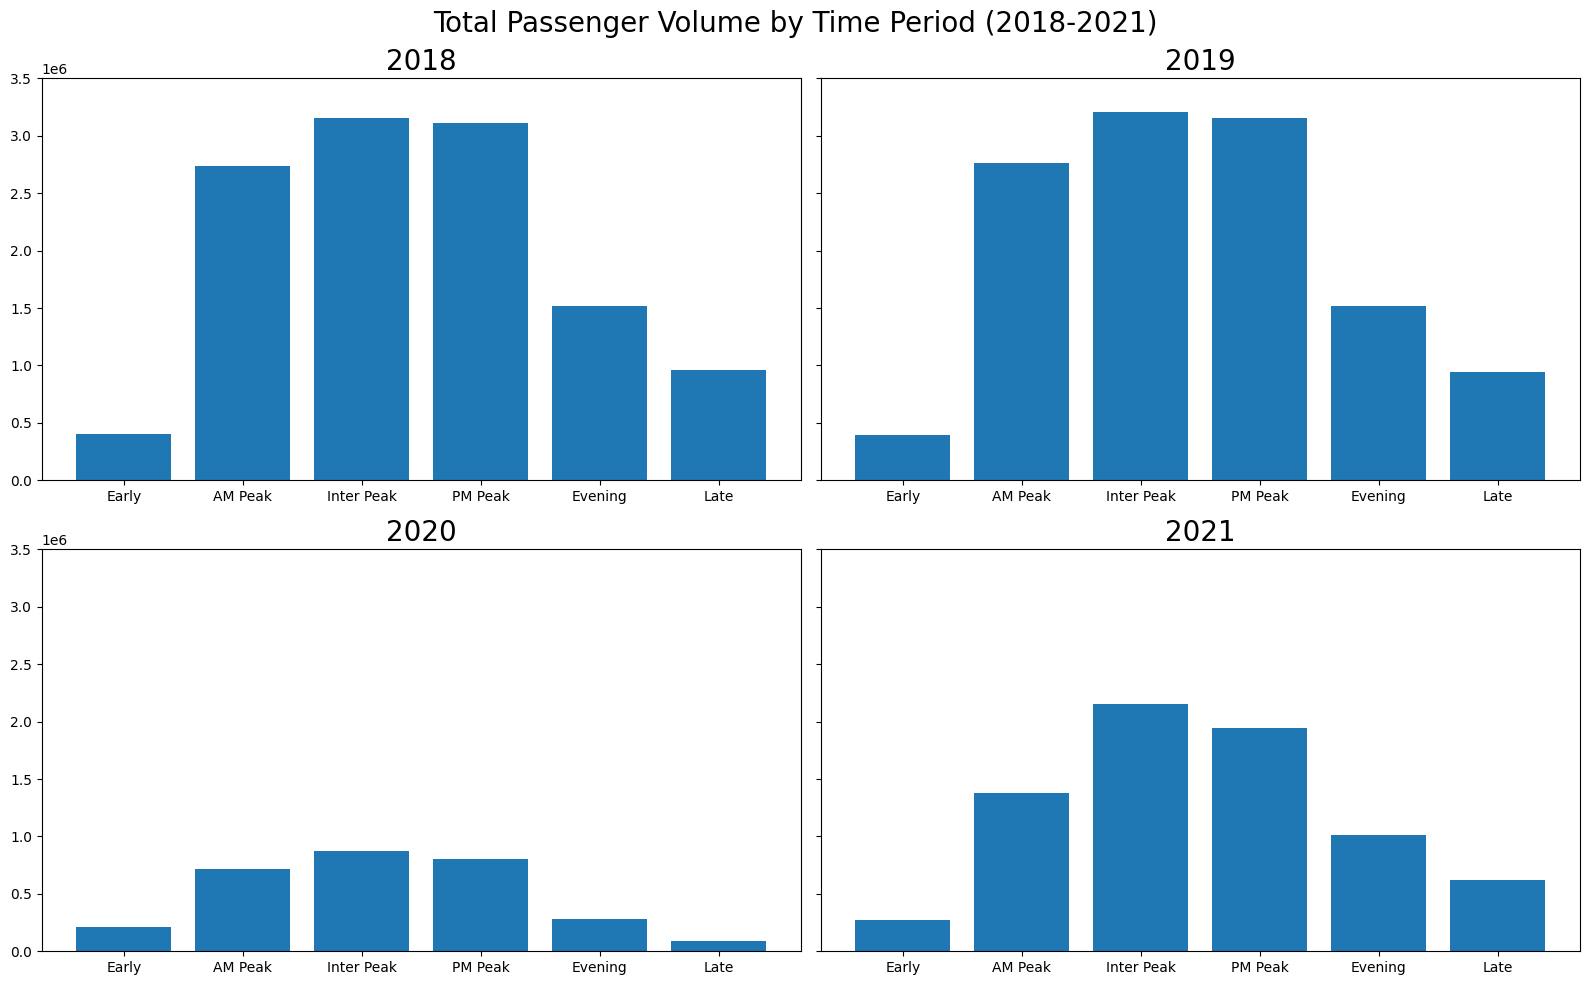

In [439]:
figure, axis = plt.subplots(2, 2, figsize=(16,10), sharey=True,  tight_layout=True)
labels=['Early', 'AM Peak', 'Inter Peak', 'PM Peak', 'Evening', 'Late']
startangle=270
explode=(0.02, 0.02, 0.02, 0.02, 0.02, 0.02)
autopct='%1.2f%%'
fontsize=20

axis[0, 0].bar(height=df2018hr[df2018hr['day']=='FRI'].sum(numeric_only=True)[3:].to_list(), 
               x=['Early', 'AM Peak', 'Inter Peak', 'PM Peak', 'Evening', 'Late'])
axis[0, 0].set_title("2018", fontdict={'fontsize': fontsize});

axis[0, 1].bar(height=df2019hr[df2019hr['day']=='FRI'].sum(numeric_only=True)[3:].to_list(), 
               x=['Early', 'AM Peak', 'Inter Peak', 'PM Peak', 'Evening', 'Late'])
axis[0, 1].set_title("2019", fontdict={'fontsize': fontsize});

axis[1, 0].bar(height=df2020hr[df2020hr['day']=='FRI'].sum(numeric_only=True)[3:].to_list(), 
               x=['Early', 'AM Peak', 'Inter Peak', 'PM Peak', 'Evening', 'Late'])
axis[1, 0].set_title("2020", fontdict={'fontsize': fontsize});

axis[1, 1].bar(height=df2021hr[df2021hr['day']=='FRI'].sum(numeric_only=True)[3:].to_list(), 
               x=['Early', 'AM Peak', 'Inter Peak', 'PM Peak', 'Evening', 'Late'])
axis[1, 1].set_title("2021", fontdict={'fontsize': fontsize});

axis[0,0].set_ylim(0, 3_500_000)
axis[0,1].set_ylim(0, 3_500_000)
axis[1,0].set_ylim(0, 3_500_000)
axis[1,1].set_ylim(0, 3_500_000)

# On the 2017 data, Friday is not classified separately and is included as 'MTF' unlike subsequent years

figure.suptitle("Total Passenger Volume by Time Period (2018-2021)", fontsize=20);

**Saturdays**

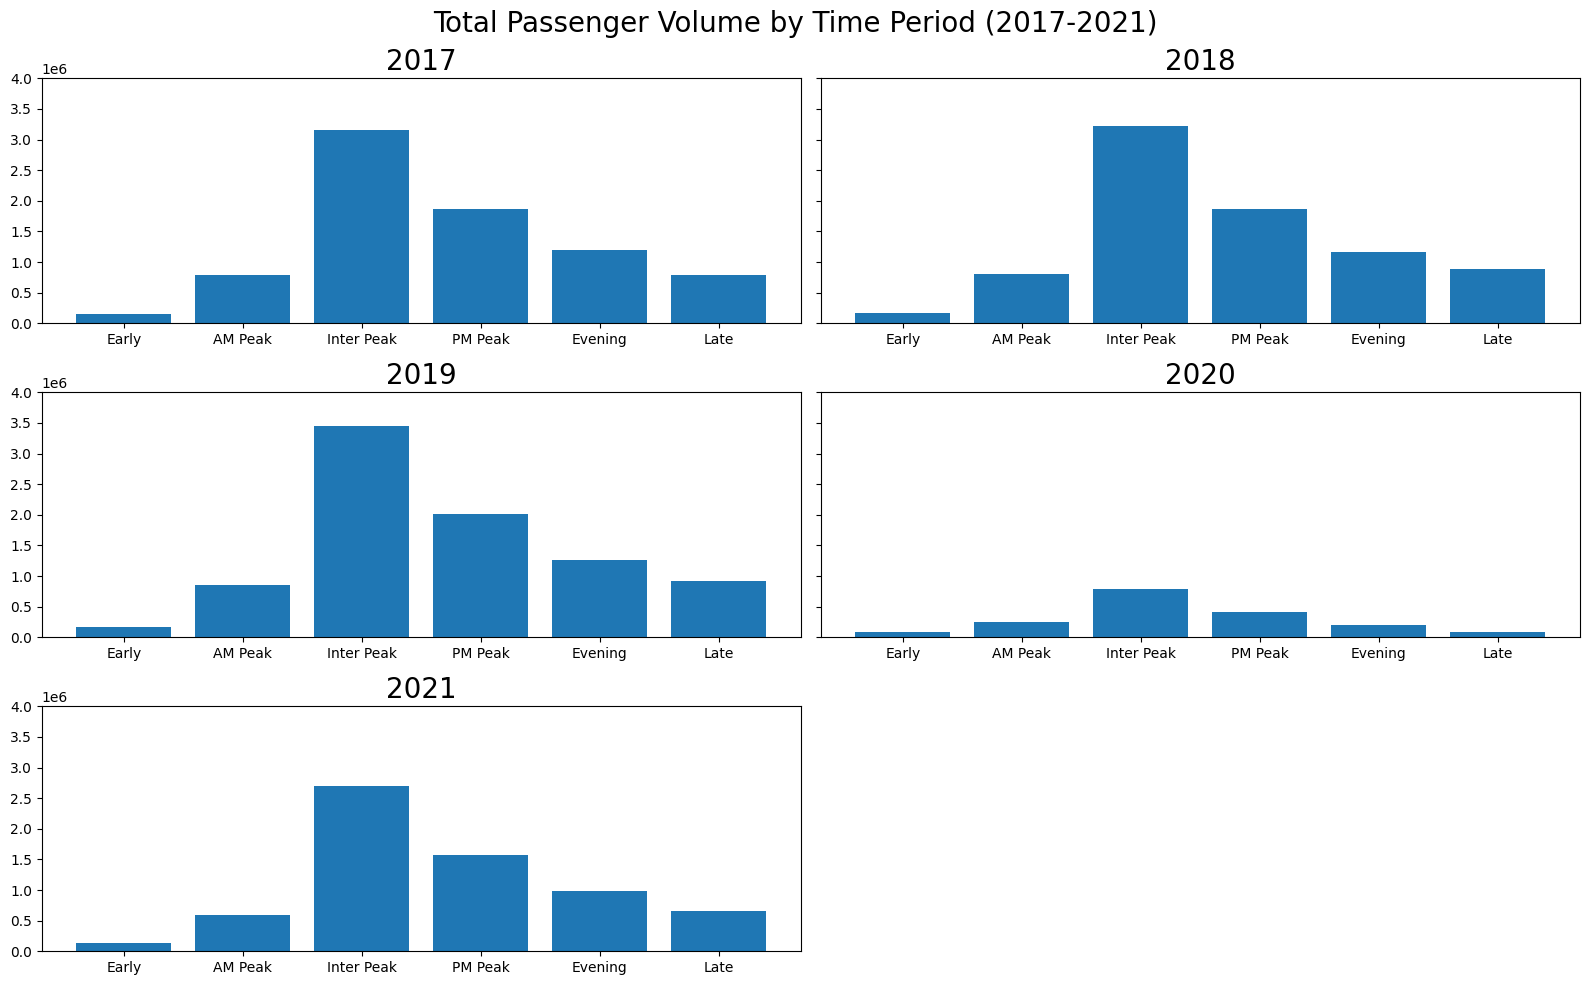

In [440]:
figure, axis = plt.subplots(3, 2, figsize=(16,10), sharey=True,  tight_layout=True)
labels=['Early', 'AM Peak', 'Inter Peak', 'PM Peak', 'Evening', 'Late']
startangle=270
explode=(0.02, 0.02, 0.02, 0.02, 0.02, 0.02)
autopct='%1.2f%%'
fontsize=20

axis[0, 0].bar(height=df2017hr[df2017hr['day']=='SAT'].sum(numeric_only=True)[3:].to_list(), 
               x=['Early', 'AM Peak', 'Inter Peak', 'PM Peak', 'Evening', 'Late'])
axis[0, 0].set_title("2017", fontdict={'fontsize': fontsize});

axis[0, 1].bar(height=df2018hr[df2018hr['day']=='SAT'].sum(numeric_only=True)[3:].to_list(), 
               x=['Early', 'AM Peak', 'Inter Peak', 'PM Peak', 'Evening', 'Late'])
axis[0, 1].set_title("2018", fontdict={'fontsize': fontsize});

axis[1, 0].bar(height=df2019hr[df2019hr['day']=='SAT'].sum(numeric_only=True)[3:].to_list(), 
               x=['Early', 'AM Peak', 'Inter Peak', 'PM Peak', 'Evening', 'Late'])
axis[1, 0].set_title("2019", fontdict={'fontsize': fontsize});

axis[1, 1].bar(height=df2020hr[df2020hr['day']=='SAT'].sum(numeric_only=True)[3:].to_list(), 
               x=['Early', 'AM Peak', 'Inter Peak', 'PM Peak', 'Evening', 'Late'])
axis[1, 1].set_title("2020", fontdict={'fontsize': fontsize});

axis[2, 0].bar(height=df2021hr[df2021hr['day']=='SAT'].sum(numeric_only=True)[3:].to_list(), 
               x=['Early', 'AM Peak', 'Inter Peak', 'PM Peak', 'Evening', 'Late'])
axis[2, 0].set_title("2021", fontdict={'fontsize': fontsize});

axis[0,0].set_ylim(0, 4_000_000)
axis[0,1].set_ylim(0, 4_000_000)
axis[1,0].set_ylim(0, 4_000_000)
axis[1,1].set_ylim(0, 4_000_000)
axis[2,0].set_ylim(0, 4_000_000)

figure.suptitle("Total Passenger Volume by Time Period (2017-2021)", fontsize=20);

figure.delaxes(axis[2,1])

**Sundays**

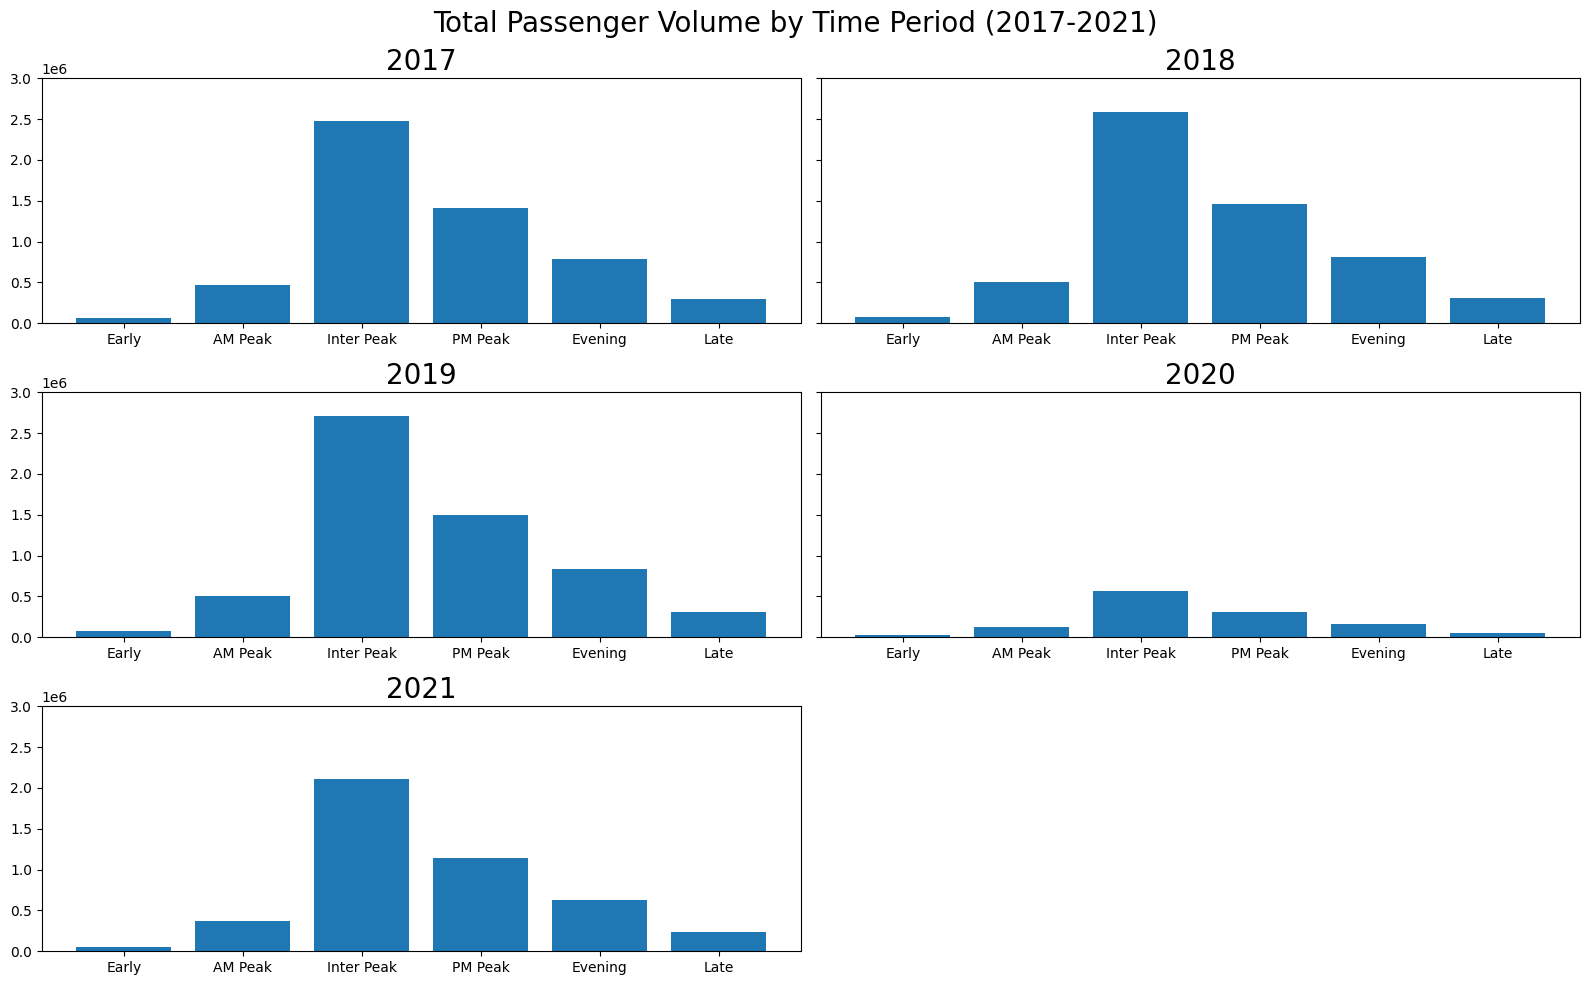

In [441]:
figure, axis = plt.subplots(3, 2, figsize=(16,10), sharey=True,  tight_layout=True)
labels=['Early', 'AM Peak', 'Inter Peak', 'PM Peak', 'Evening', 'Late']
startangle=270
explode=(0.02, 0.02, 0.02, 0.02, 0.02, 0.02)
autopct='%1.2f%%'
fontsize=20

axis[0, 0].bar(height=df2017hr[df2017hr['day']=='SUN'].sum(numeric_only=True)[3:].to_list(), 
               x=['Early', 'AM Peak', 'Inter Peak', 'PM Peak', 'Evening', 'Late'])
axis[0, 0].set_title("2017", fontdict={'fontsize': fontsize});

axis[0, 1].bar(height=df2018hr[df2018hr['day']=='SUN'].sum(numeric_only=True)[3:].to_list(), 
               x=['Early', 'AM Peak', 'Inter Peak', 'PM Peak', 'Evening', 'Late'])
axis[0, 1].set_title("2018", fontdict={'fontsize': fontsize});

axis[1, 0].bar(height=df2019hr[df2019hr['day']=='SUN'].sum(numeric_only=True)[3:].to_list(), 
               x=['Early', 'AM Peak', 'Inter Peak', 'PM Peak', 'Evening', 'Late'])
axis[1, 0].set_title("2019", fontdict={'fontsize': fontsize});

axis[1, 1].bar(height=df2020hr[df2020hr['day']=='SUN'].sum(numeric_only=True)[3:].to_list(), 
               x=['Early', 'AM Peak', 'Inter Peak', 'PM Peak', 'Evening', 'Late'])
axis[1, 1].set_title("2020", fontdict={'fontsize': fontsize});

axis[2, 0].bar(height=df2021hr[df2021hr['day']=='SUN'].sum(numeric_only=True)[3:].to_list(), 
               x=['Early', 'AM Peak', 'Inter Peak', 'PM Peak', 'Evening', 'Late'])
axis[2, 0].set_title("2021", fontdict={'fontsize': fontsize});

axis[0,0].set_ylim(0, 3_000_000)
axis[0,1].set_ylim(0, 3_000_000)
axis[1,0].set_ylim(0, 3_000_000)
axis[1,1].set_ylim(0, 3_000_000)
axis[2,0].set_ylim(0, 3_000_000)

figure.suptitle("Total Passenger Volume by Time Period (2017-2021)", fontsize=20);

figure.delaxes(axis[2,1])

**Presented below is the Entry/Exit figures by time period, as percenatges, over the years**

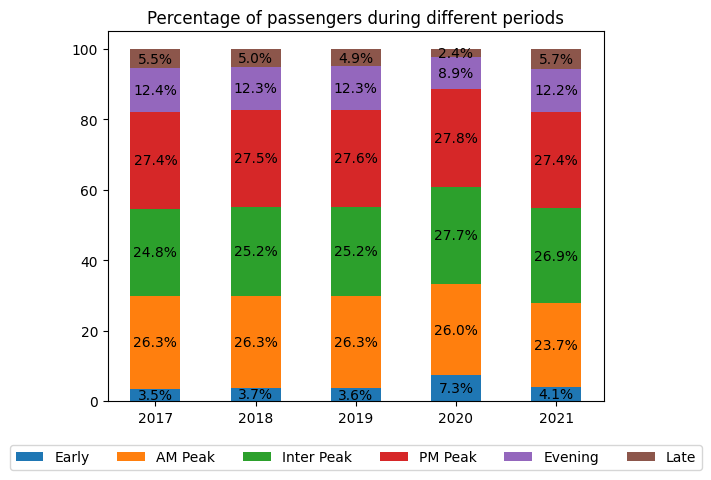

In [442]:
x = ('2017', '2018', '2019', '2020', '2021');

periods = {
    'Early': np.array([410606, 426922, 422622, 217860, 301384]), 
    'AM Peak': np.array([3050039, 3049475, 3100335, 779180, 1744411]),   
    'Inter Peak': np.array([2880265, 2920222, 2971552, 829986, 1979360]),  
    'PM Peak': np.array([3183198, 3194781, 3254342, 834653, 2011992]),
    'Evening': np.array([1439332, 1430876, 1447731, 266806, 893644]),
    'Late': np.array([637978, 580478, 581302, 71054, 419004])
};

total = np.sum(list(periods.values()), axis=0);
bottom = np.zeros(len(x));

width = 0.5

fig, ax = plt.subplots();

for boolean, periods in periods.items():
    p = ax.bar(x, periods / total * 100, width, label=boolean, bottom=bottom);
    bottom += periods / total * 100
    for i, bar in enumerate(p):
        x_pos = bar.get_x() + bar.get_width() / 2
        y_pos = bar.get_y() + bar.get_height() / 2
        value = '{:.1f}%'.format(periods[i] / total[i] * 100);
        ax.text(x_pos, y_pos, value, ha='center', va='center');

ax.set_title("Percentage of passengers during different periods");

# Move the legend outside the axis
ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1), ncol=6);

plt.show();

###### Observations 🔎

- 🦠 Unsurprisingly, the Covid-19 pandemic has had a significant impact on TfL's passenger numbers in 2020 and 2021. 

- 📉 The fraction of passengers travelling during the 'AM Peak' period has dropped from an average of 26.3% to 23.7% in 2021. 💼 This could be due to the [rise of hybrid/remote work schedules](https://www.ons.gov.uk/employmentandlabourmarket/peopleinwork/employmentandemployeetypes/articles/ishybridworkingheretostay/2022-05-23), as more people are able to work from home and avoid the rush hour commute. The other periods have remained relatively stable over the years.

It will be interesting to see how these trends develop in 2022 when more data is made available.

### Creating indexes

Indexes can also be applied to gain insights into passenger behavior and usage patterns. By creating an index based on factors such as station popularity, time of day, and day of the week, we can identify the busiest and least busy stations, as well as how other stations on the network are trending.

As we noticed earlier, the Covid-19 pandemic has had a drastic effect on commuter figures through London. To find the impact of the pandemic on ridership at specific stations, the average passengers for pre and post-covid years is calculated and used to create the 'Post-Covid impact' index (PCI). The calculated index will be a factor between 0 & 1 representing how close the ridership is to pre-COVID levels. That is to say:
- *The closer a station's 'Post-Covid impact' index is to 1, the less affected it was because its commuter figure is closer to pre-pandemic levels.* 
- *and the closer a station's index is to 0, the more affected it was as its commuter figure is significantly lower than pre-pandemic levels.* 

It is worth noting that some specific change in passenger behavior in this period is not attributable to the effects of COVID. For example, changes in passenger behaviour (adoption of hybrid/remote work schedules), station closure or network changes can also impact the data. We will look into this later on and comment on any areas where this is likely the case.

**Note:** 
All stations which opened after 2019 or were closed for a large portion of this period (Heathrow Terminal 4), will not be considered in this analysis.

In [443]:
df_stations['Post-Covid impact'] = 1-(df_stations[["En/Ex 2017", "En/Ex 2018", "En/Ex 2019"]].mean(axis=1, skipna=True) - 
                                    df_stations[["En/Ex 2021"]].mean(axis=1, skipna=False))/(
                                    df_stations[["En/Ex 2017", "En/Ex 2018", "En/Ex 2019"]].mean(axis=1, skipna=True)) 
df_stations.sort_values('Post-Covid impact', ascending=True, inplace=True)
df_stations=df_stations[df_stations['Post-Covid impact'] > 0] 
df_stations.head(5)

NLC           Station  En/Ex 2007  En/Ex 2008  En/Ex 2009  En/Ex 2010  \
291  858.0            Poplar         NaN         NaN         NaN         NaN   
33   536.0  Cannon Street LU   4109347.0   4540496.0   3932511.0   3947306.0   
184  695.0  St. James's Park  13084320.0  13189508.0  13424654.0  13300266.0   
131  639.0     Mansion House   5109887.0   5320220.0   7034245.0   7199238.0   
183  694.0    Russell Square  13592202.0  13593560.0  14045262.0  14182721.0   

     En/Ex 2011  En/Ex 2012  En/Ex 2013  En/Ex 2014  En/Ex 2015  En/Ex 2016  \
291         NaN         NaN         NaN         NaN         NaN         NaN   
33    4047494.0   4088480.0   4644524.0   5299813.0   7485065.0   8983249.0   
184  13496515.0  14261759.0  14726104.0  15730145.0  15698186.0  14934536.0   
131   7416215.0   5645557.0   5769586.0   6195631.0   5561213.0   6136459.0   
183  14728330.0  13436431.0  12951499.0  13076625.0  13328942.0  12345236.0   

     En/Ex 2017  En/Ex 2018  En/Ex 2019  En/Ex 2020  En/Ex 2021  \
291   4713917.0   4567851.0   4967283.0   1135902.0    825604.0   
33    8996282.0   7399745.0   7108243.0   1559861.0   2147772.0   
184  13664987.0  14169247.0  14479978.0   2919119.0   3901970.0   
131   6140305.0   7106682.0   6789496.0   1067130.0   2088948.0   
183  10853914.0  11896108.0  12274252.0   2744465.0   3655414.0   

                LINES             NETWORK London Underground Elizabeth Line  \
291               DLR                 NaN                NaN            NaN   
33   District, Circle  London Underground                Yes            NaN   
184  District, Circle  London Underground                Yes            NaN   
131  District, Circle  London Underground                Yes            NaN   
183        Piccadilly  London Underground                Yes            NaN   

    London Overground  DLR  Post-Covid impact  
291               NaN  Yes           0.173823  
33                NaN  NaN           0.274134  
184               NaN  NaN           0.276643  
131               NaN  NaN           0.312772  
183               NaN  NaN           0.313104

In [444]:
df1 = pd.read_csv('data/Geodata/Stations_20220221.csv')
df1 = df1.drop(df1[df1.LINES == 'Tramlink'].index) # Dropping any stations on the Tramlink Network
df1.sample(1)

NLC        NAME  EASTING  NORTHING LINES NETWORK London Underground  \
364  861  South Quay   537597    179824   DLR     NaN                NaN   

    Elizabeth Line London Overground  DLR Zone         x          y  
364            NaN               NaN  Yes    2 -0.017414  51.500099

**Plotted below are the most affected stations by our 'Post-Covid impact' index**

In [445]:
px.bar(df_stations[df_stations['Post-Covid impact'] > 0] 
       # Drops stations with NaN or 0 values (Station was closed)
       .head(20),
       y='Station',
       x='Post-Covid impact',
       title='Bottom 20 Stations by PCI'
      )

In [446]:
df_stations.tail(30)

NLC                      Station  En/Ex 2007  En/Ex 2008  En/Ex 2009  \
388  6954.0                  Wood Street         NaN         NaN         NaN   
370  6876.0                  Forest Gate         NaN         NaN         NaN   
366  6814.0                     Cheshunt         NaN         NaN         NaN   
396  6967.0                 Rectory Road         NaN         NaN         NaN   
281   749.0        Stratford High Street         NaN         NaN         NaN   
310   894.0               Gallions Reach         NaN         NaN         NaN   
383  6934.0              Stoke Newington         NaN         NaN         NaN   
392  6961.0             Bethnal Green LO         NaN         NaN         NaN   
279   559.0              West Silvertown         NaN         NaN         NaN   
335  1439.0  Caledonian Road & Barnsbury         NaN         NaN         NaN   
344  1451.0              South Hampstead         NaN         NaN         NaN   
375  6883.0                   Manor Park         NaN         NaN         NaN   
272   884.0                 Canning Town   8098981.0   7982681.0   7834906.0   
410  7408.0                Wanstead Park         NaN         NaN         NaN   
351  5356.0               Crystal Palace         NaN         NaN         NaN   
292   859.0            Pudding Mill Lane         NaN         NaN         NaN   
404  7401.0        Harringay Green Lanes         NaN         NaN         NaN   
408  7406.0                  Crouch Hill         NaN         NaN         NaN   
390  6958.0                  Bruce Grove         NaN         NaN         NaN   
393  6962.0              Cambridge Heath         NaN         NaN         NaN   
377  6888.0                    Shenfield         NaN         NaN         NaN   
415  3000.0              Acton Main Line         NaN         NaN         NaN   
402  6978.0                 Hackney Wick         NaN         NaN         NaN   
347  1524.0               Upper Holloway         NaN         NaN         NaN   
398  6970.0                     Maryland         NaN         NaN         NaN   
298   866.0              West India Quay         NaN         NaN         NaN   
419  3187.0                     Southall         NaN         NaN         NaN   
421  3191.0                      Hanwell         NaN         NaN         NaN   
304   887.0                 Custom House         NaN         NaN         NaN   
416  3087.0                Paddington NR         NaN         NaN         NaN   

     En/Ex 2010  En/Ex 2011  En/Ex 2012  En/Ex 2013  En/Ex 2014  En/Ex 2015  \
388         NaN         NaN         NaN         NaN         NaN         NaN   
370         NaN         NaN         NaN         NaN         NaN         NaN   
366         NaN         NaN         NaN         NaN         NaN         NaN   
396         NaN         NaN         NaN         NaN         NaN         NaN   
281         NaN         NaN         NaN         NaN         NaN         NaN   
310         NaN         NaN         NaN         NaN         NaN         NaN   
383         NaN         NaN         NaN         NaN         NaN         NaN   
392         NaN         NaN         NaN         NaN         NaN         NaN   
279         NaN         NaN         NaN         NaN         NaN         NaN   
335         NaN         NaN         NaN         NaN         NaN         NaN   
344         NaN         NaN         NaN         NaN         NaN         NaN   
375         NaN         NaN         NaN         NaN         NaN         NaN   
272   8223551.0   8710542.0   8737992.0   9784093.0  10100164.0  10916031.0   
410         NaN         NaN         NaN         NaN         NaN         NaN   
351         NaN         NaN         NaN         NaN         NaN         NaN   
292         NaN         NaN         NaN         NaN         NaN         NaN   
404         NaN         NaN         NaN         NaN         NaN         NaN   
408         NaN         NaN         NaN         NaN         NaN         NaN   
390         NaN         Na

In [447]:
# The figures may add up to more than 30 as a station can be on multiple TfL networks

print('Out of the top 30 stations by PCI:')
print('-', df_stations.tail(30)[df_stations.tail(30)['London Underground'] == 'Yes'].shape[0], 'are on the London Underground')
print('-', df_stations.tail(30)[df_stations.tail(30)['London Overground'] == 'Yes'].shape[0], 'are on the London Overground')
print('-', df_stations.tail(30)[df_stations.tail(30)['DLR'] == 'Yes'].shape[0], 'are on the DLR')
print('-', df_stations.tail(30)[df_stations.tail(30)['Elizabeth Line'] == 'Yes'].shape[0], 'are on the Elizabeth Line')
print(" ")
print('Out of the bottom 30 stations by PCI:')
print('-', df_stations.head(30)[df_stations.head(30)['London Underground'] == 'Yes'].shape[0], 'are on the London Underground')
print('-', df_stations.head(30)[df_stations.head(30)['London Overground'] == 'Yes'].shape[0], 'are on the London Overground')
print('-', df_stations.head(30)[df_stations.head(30)['DLR'] == 'Yes'].shape[0], 'are on the DLR')
print('-', df_stations.head(30)[df_stations.head(30)['Elizabeth Line'] == 'Yes'].shape[0], 'are on the Elizabeth Line')

Out of the top 30 stations by PCI:
- 1 are on the London Underground
- 15 are on the London Overground
- 7 are on the DLR
- 9 are on the Elizabeth Line
 
Out of the bottom 30 stations by PCI:
- 28 are on the London Underground
- 0 are on the London Overground
- 3 are on the DLR
- 1 are on the Elizabeth Line


As we can see the stations most affected are largely London Underground stations. 
Also, a lot of the newly opened Elizabeth line stations score very highly on PCI indicating little or no effect post-pandemic 

Another interesting angle is looking at how the network has changed in the past few years.

As I mentioned earlier, not all recent change is attributable to the effects of the pandemic. For a snapshot of this, we will create two indices 'Upturn' and 'Downturn'. These indexes will look at the stations with the greatest upturn and downturn in commuter figures after 2020 respectively. 

In [448]:
df_downturn=pd.merge(df_merged[df_merged['En/Ex 2020'] > df_merged['En/Ex 2021']],
                     df1,
                     on='NLC') # Creating a DF of all the stations which saw a decrease in commuter figures
df_downturn.drop([32], inplace=True) # Dropping East Acton Station
df_downturn['Downturn'] = df_downturn["En/Ex 2021"]/df_downturn["En/Ex 2020"] # Calculating the 'Downturn' of the selected stations
df_downturn = df_downturn[['Downturn'] + [x for x in df_downturn.columns if x != 'Downturn']] # Just rearrnging the order of the columns to place Downturn first 
df_downturn = df_downturn.query('Downturn <= 0.75') # Setting the qualifier for stations in the DF
df_downturn.sort_values('Downturn', ascending=True, inplace=True)
df_downturn['Downturn']=df_downturn['Downturn'].round(3)
df_downturn = df_downturn.head(30)
df_downturn["Coordinates"] = list(zip(df_downturn.EASTING, df_downturn.NORTHING)) # Creating geodata
df_downturn["Coordinates"] = df_downturn["Coordinates"].apply(Point)
gdf_downturn = gpd.GeoDataFrame(df_downturn, geometry="Coordinates") # Creates a Geopandas DF with the geodata
df_downturn.shape[0] # Shows how many stations are present in the DF.

30

**Notes:**
- East Acton station [underwent extensive renovation from 2021 to 2022](https://web.archive.org/web/20230130222836/https://tfl.gov.uk/corporate/transparency/freedom-of-information/foi-request-detail?referenceId=FOI-2730-2122) and was closed during this period. As such, it will be dropped as its data is incomplete.


In [449]:
px.bar(df_downturn.sort_values('Downturn', ascending=True),
       # Threshold of 7 non-NA values to filter stations with less than 4 years of data
       y='Station',
       x='Downturn',
       height=850,
       title='TfL Stations by Downturn',
       range_x=[0, 1]
)

In [450]:
df_upturn=pd.merge(df_merged[df_merged['En/Ex 2020'] < df_merged['En/Ex 2021']],              
                   df1,              
                   on='NLC') # Creating a DF of all the stations which saw an increase in commuter figures
df_upturn['Upturn'] = df_upturn["En/Ex 2021"]/df_upturn["En/Ex 2020"] # Calculating the 'Upturn' of the selected stations
df_upturn = df_upturn[['Upturn'] + [x for x in df_upturn.columns if x != 'Upturn']] # Just rearrnging the order of the columns to place Downturn first 
df_upturn = df_upturn.query('Upturn >= 1.7') # Setting the qualifier for stations in the DF
df_upturn.sort_values('Upturn', ascending=False, inplace=True)
df_upturn['Upturn']=df_upturn['Upturn'].round(3)
df_upturn = df_upturn.head(30)
df_upturn["Coordinates"] = list(zip(df_upturn.EASTING, df_upturn.NORTHING)) # Creating geodata
df_upturn["Coordinates"] = df_upturn["Coordinates"].apply(Point)
gdf_upturn = gpd.GeoDataFrame(df_upturn, geometry="Coordinates") # Creates a Geopandas DF with the geodata
df_upturn.shape[0] # Shows how many stations are present in the DF.

30

In [451]:
df_upturn.head(5)

Upturn     NLC     Station  En/Ex 2007  En/Ex 2008  En/Ex 2009  \
231  62.484  3155.0     Twyford         NaN         NaN         NaN   
228  19.235  3147.0  Maidenhead         NaN         NaN         NaN   
230  12.786  3151.0      Taplow         NaN         NaN         NaN   
234   9.261  3172.0      Slough         NaN         NaN         NaN   
236   8.417  3176.0     Burnham         NaN         NaN         NaN   

     En/Ex 2010  En/Ex 2011  En/Ex 2012  En/Ex 2013  En/Ex 2014  En/Ex 2015  \
231         NaN         NaN         NaN         NaN         NaN         NaN   
228         NaN         NaN         NaN         NaN         NaN         NaN   
230         NaN         NaN         NaN         NaN         NaN         NaN   
234         NaN         NaN         NaN         NaN         NaN         NaN   
236         NaN         NaN         NaN         NaN         NaN         NaN   

     En/Ex 2016  En/Ex 2017  En/Ex 2018  En/Ex 2019  En/Ex 2020  En/Ex 2021  \
231         NaN         NaN         NaN         NaN     13407.0    837725.0   
228         NaN         NaN         NaN         NaN    102141.0   1964707.0   
230         NaN         NaN         NaN         NaN     20878.0    266945.0   
234         NaN         NaN         NaN         NaN    234410.0   2170889.0   
236         NaN         NaN         NaN         NaN    106258.0    894325.0   

           NAME  EASTING  NORTHING     LINES NETWORK London Underground  \
231     Twyford   479041    175787  TfL Rail     NaN                NaN   
228  Maidenhead   488724    180745  TfL Rail     NaN                NaN   
230      Taplow   491579    181340  TfL Rail     NaN                NaN   
234      Slough   497838    180157  TfL Rail     NaN                NaN   
236     Burnham   494007    181378  TfL Rail     NaN                NaN   

    Elizabeth Line London Overground  DLR Zone         x          y  \
231            Yes               NaN  NaN   -1 -0.863307  51.475533   
228            Yes               NaN  NaN   -1 -0.722675  51.518667   
230            Yes               NaN  NaN   -1 -0.681385  51.523561   
234            Yes               NaN  NaN   -1 -0.591525  51.511879   
236            Yes               NaN  NaN   -1 -0.646388  51.523504   

                       Coordinates  
231  POINT (479041.000 175787.000)  
228  POINT (488724.000 180745.000)  
230  POINT (491579.000 181340.000)  
234  POINT (497838.000 180157.000)  
236  POINT (494007.000 181378.000)

In [452]:
px.bar(df_upturn.sort_values('Upturn', ascending=True),
       y='Station',
       x='Upturn',
       height=850,
       title='TfL stations by Upturn',
       log_x=True 
       # I made this a log graph to since Twyford's PCI was so high
)

**Below we can see the breakdown of which networks carry these stations**

In [453]:
print('Out of the top 30 stations by Downturn:')
print('-', gdf_downturn[gdf_downturn['London Underground'] == 'Yes'].shape[0], 'are on the London Underground') 
print('-', gdf_downturn[gdf_downturn['London Overground'] == 'Yes'].shape[0], 'are on the London Overground')
print('-', gdf_downturn[gdf_downturn['DLR'] == 'Yes'].shape[0], 'are on the DLR')
print('-', gdf_downturn[gdf_downturn['Elizabeth Line'] == 'Yes'].shape[0], 'is on the Elizabeth Line')
print(" ")
print('Out of the top 30 stations by Upturn:')
print('-', gdf_upturn[gdf_upturn['London Underground'] == 'Yes'].shape[0], 'are on the London Underground')
print('-', gdf_upturn[gdf_upturn['London Overground'] == 'Yes'].shape[0], 'are on the London Overground')
print('-', gdf_upturn[gdf_upturn['DLR'] == 'Yes'].shape[0], 'are on the DLR')
print('-', gdf_upturn[gdf_upturn['Elizabeth Line'] == 'Yes'].shape[0], 'are on the Elizabeth Line')

# The figures may add up to more than 30 as a station can be on multiple TfL networks

Out of the top 30 stations by Downturn:
- 28 are on the London Underground
- 5 are on the London Overground
- 0 are on the DLR
- 1 is on the Elizabeth Line
 
Out of the top 30 stations by Upturn:
- 16 are on the London Underground
- 2 are on the London Overground
- 5 are on the DLR
- 10 are on the Elizabeth Line


###### Observations 🔎
- 📉 We notice that 28 of the 30 stations trending downward are on the London Underground.
- 📈 7 of the stations on the newly built Elizabeth line also flesh out the stations trending upward.

### Plotting Stations

In this next segment, we will be creating indexes and plotting the TfL stations to analyze the commuter data. 

#### A couple things we'll need to make our maps look better...

These are a couple utlities and calls that will make our graphs down below look better and more informative. Again, you can choose to collapse this section with a click of a button 🤏 and move on to the next. That is where all the fun is anyway.

In [454]:
tube_lines = {
    "Bakerloo":             {"id":"B", "colour":"#B36305", "network":"Tube"},
    "Central":              {"id":"C", "colour":"#E32017", "network":"Tube"},
    "Circle":               {"id":"I", "colour":"#FFD300", "network":"Tube"},
    "Elizabeth line":       {"id":"X", "colour":"#7156A5", "network":"Rail"},
    "DLR":                  {"id":"L", "colour":"#00A4A7", "network":"Rail"},
    "District":             {"id":"D", "colour":"#00782A", "network":"Tube"},
    "Hammersmith & City":   {"id":"H", "colour":"#F3A9BB", "network":"Tube"},
    "Jubilee":              {"id":"J", "colour":"#A0A5A9", "network":"Tube"},
    "Metropolitan":         {"id":"M", "colour":"#9B0056", "network":"Tube"},
    "Northern":             {"id":"N", "colour":"#000000", "network":"Tube"},
    "London Overground":    {"id":"O", "colour":"#EE7C0E", "network":"Rail"},
    "Piccadilly":           {"id":"P", "colour":"#003688", "network":"Tube"},
    "Tramlink":             {"id":"T", "colour":"#84B817", "network":"Tramlink"},
    "Victoria":             {"id":"V", "colour":"#0098D4", "network":"Tube"},
    "Waterloo & City":      {"id":"W", "colour":"#95CDBA", "network":"Tube"}
} # The Tube lines and their corresponding colour scheme and network.

In [455]:
# Define the style function for 
def style_function(feature):
    line_id = feature["properties"]["id"]
    line_colour = tube_lines[line_id]["colour"]
    return {
        "color": line_colour,
        "weight": 4,
        "opacity": 0.8,
    }

In [456]:
ldn_df = gpd.read_file("data/Geodata/London-wards-2018/London-wards-2018_ESRI/London_Ward_CityMerged.shp")
ldn_df.sample(3)

NAME   GSS_CODE DISTRICT  LAGSSCODE  HECTARES  NONLD_AREA  \
160      Roxbourne  E05000301   Harrow  E09000015   150.576         0.0   
208    East Barnet  E05000048   Barnet  E09000003   374.943         0.0   
518  Regent's Park  E05000142   Camden  E09000007   134.956         0.0   

                                              geometry  
160  POLYGON ((512390.901 185765.704, 512387.397 18...  
208  POLYGON ((527286.099 194350.897, 527135.198 19...  
518  POLYGON ((528891.099 182192.597, 528891.396 18...

In [457]:
ldn_df2=gpd.read_file("data/Geodata/London-shp-files/lp-falp-2006-inner-outer-london.shp")
ldn_df2

Designated                                             Source  \
0      Inner  The London Plan consolidated with alterations ...   
1      Outer  The London Plan consolidated with alterations ...   

      Shape_Leng    Shape_Area  \
0  130298.412266  3.279628e+08   
1  386483.894147  1.266756e+09   

                                            geometry  
0  POLYGON ((539430.398 180419.005, 539410.799 18...  
1  POLYGON ((553563.496 178641.204, 553615.498 17...

In [458]:
df1 = pd.read_csv('data/Geodata/Stations_20220221.csv')
df1 = df1.drop(df1[df1.LINES == 'Tramlink'].index)
df1.drop(columns=['NETWORK',
                  'LINES',
                  'London Underground', 
                  'Elizabeth Line', 
                  'London Overground', 
                  'DLR'], inplace=True)
df1.sample(4)

NLC              NAME  EASTING  NORTHING Zone         x          y
333  687     Rickmansworth   505716    194601    7 -0.472133  51.639799
400  727  Tooting Broadway   527434    171443    3 -0.166791  51.427157
61   531    Buckhurst Hill   541778    193891    5  0.048455  51.625483
126  565     East Finchley   527222    189184    3 -0.163439  51.586653

In [459]:
df1["Coordinates"] = list(zip(df1.EASTING, df1.NORTHING))
df1["Coordinates"] = df1["Coordinates"].apply(Point)
gdf = gpd.GeoDataFrame(df1, geometry="Coordinates")
gdf.sample()

NLC      NAME  EASTING  NORTHING Zone         x          y  \
314  676  Plaistow   540003    183297    3  0.018613  51.530721   

                       Coordinates  
314  POINT (540003.000 183297.000)

In [460]:
url = (
    "https://raw.githubusercontent.com/Osakwe1/vis/master/tubecreature/data"
)
tfl_network = f"{url}/tfl_lines.json"

Now, we'll set a threshold for which station will make it on our maps and explain any reasons for disqualification

In [461]:
df_plot=df_stations[df_stations['Post-Covid impact'] > 0].sort_values('Post-Covid impact', ascending=False)
df_plot['Post-Covid impact']=df_plot['Post-Covid impact'].round(3)
print(df_plot.shape)
df_plot.head()

(415, 24)


NLC          Station  En/Ex 2007  En/Ex 2008  En/Ex 2009  En/Ex 2010  \
416  3087.0    Paddington NR         NaN         NaN         NaN         NaN   
304   887.0     Custom House         NaN         NaN         NaN         NaN   
421  3191.0          Hanwell         NaN         NaN         NaN         NaN   
419  3187.0         Southall         NaN         NaN         NaN         NaN   
298   866.0  West India Quay         NaN         NaN         NaN         NaN   

     En/Ex 2011  En/Ex 2012  En/Ex 2013  En/Ex 2014  En/Ex 2015  En/Ex 2016  \
416         NaN         NaN         NaN         NaN         NaN         NaN   
304         NaN         NaN         NaN         NaN         NaN         NaN   
421         NaN         NaN         NaN         NaN         NaN         NaN   
419         NaN         NaN         NaN         NaN         NaN         NaN   
298         NaN         NaN         NaN         NaN         NaN         NaN   

     En/Ex 2017  En/Ex 2018  En/Ex 2019  En/Ex 2020  En/Ex 2021  \
416         NaN   4086849.0   4722949.0   5977071.0   8513238.0   
304         0.0   2242447.0   2205585.0    774342.0   2065445.0   
421         NaN    364993.0    675795.0    387664.0    576380.0   
419         NaN   1723747.0   2563229.0   1429088.0   2294079.0   
298   1280769.0   1355439.0   1305312.0    296160.0   1329826.0   

             LINES NETWORK London Underground Elizabeth Line  \
416       TfL Rail     NaN                NaN            Yes   
304  DLR, TfL Rail     NaN                NaN            Yes   
421       TfL Rail     NaN                NaN            Yes   
419       TfL Rail     NaN                NaN            Yes   
298            DLR     NaN                NaN            NaN   

    London Overground  DLR  Post-Covid impact  
416               NaN  NaN              1.933  
304               NaN  Yes              1.393  
421               NaN  NaN              1.108  
419               NaN  NaN              1.070  
298               NaN  Yes              1.012

##### Done!

Now that we have all this set up, we can begin creating plots of our data.

#### Plots using Folium, Geopandas & Matplotlib

##### As a start, here is every station on the TfL network (including Tramlink!)

<AxesSubplot:>

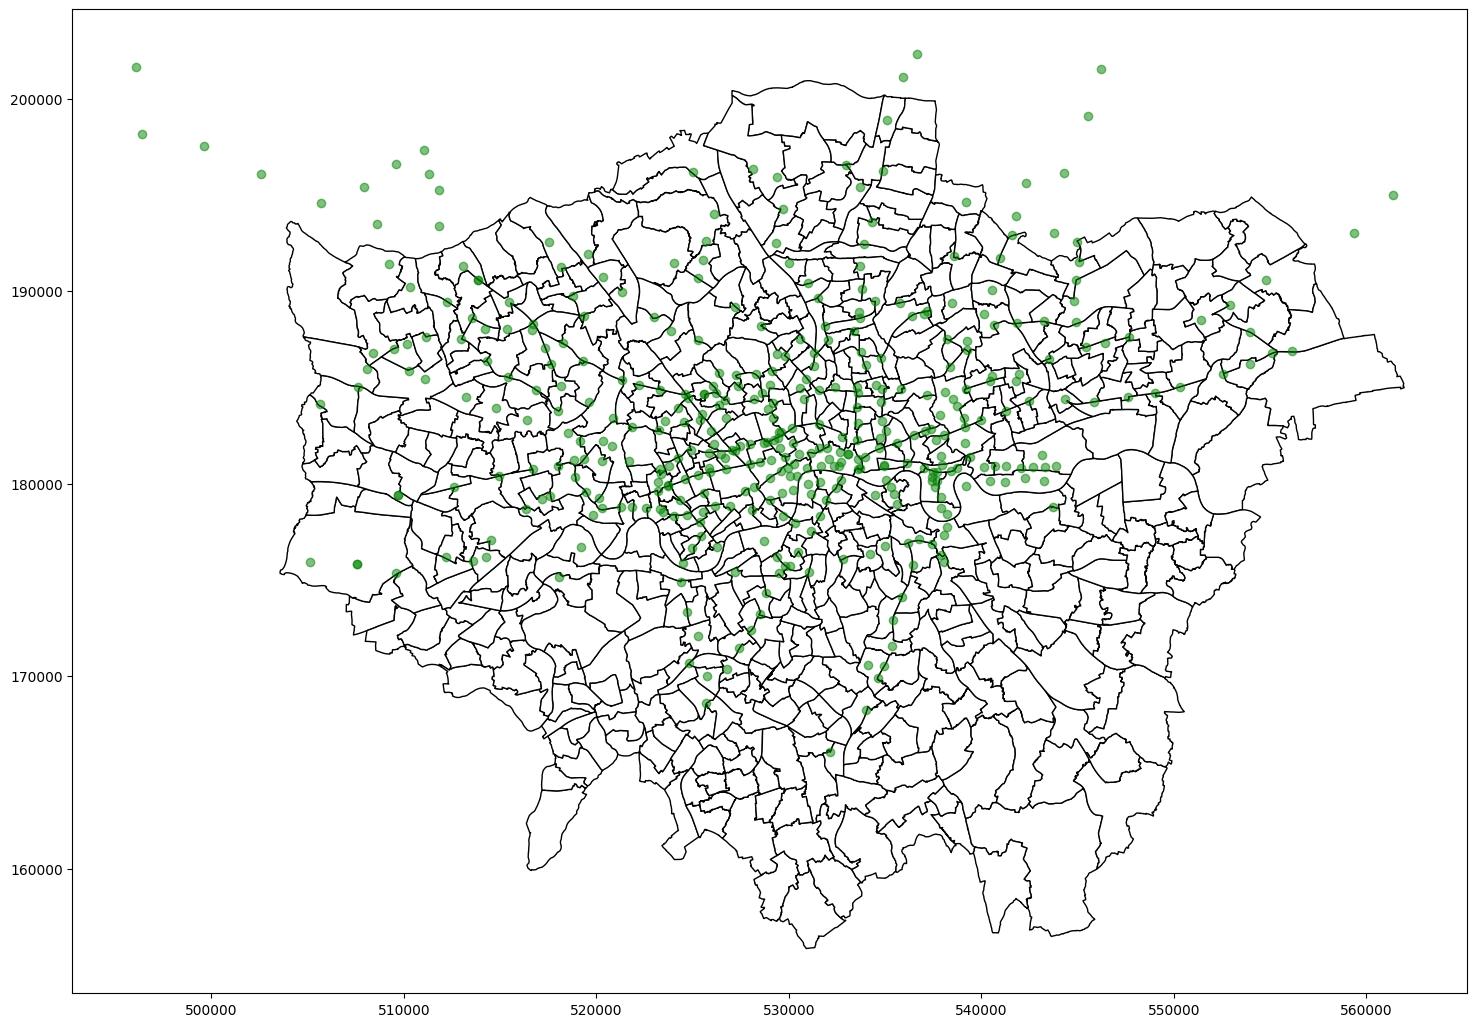

In [462]:
### Creating a Geopandas dataframe of all TfL stations
df_all=pd.merge(df_plot,
                df1,
                on='NLC',   
                how='inner').drop(columns=['NETWORK', 'Zone'])
df_all["Coordinates"] = list(zip(df_all.EASTING, df_all.NORTHING))
df_all["Coordinates"] = df_all["Coordinates"].apply(Point)
gdf_all = gpd.GeoDataFrame(df_all, geometry="Coordinates")

# Creating a Geopandas dataframe of the bottom 30 stations by the 'Post-Covid impact' index
df_btm30=pd.merge(df_plot.tail(30),
                  df1,
                  on='NLC',
                  how='inner')
df_btm30["Coordinates"] = list(zip(df_btm30.EASTING, df_btm30.NORTHING))
df_btm30["Coordinates"] = df_btm30["Coordinates"].apply(Point)
gdf_btm30 = gpd.GeoDataFrame(df_btm30, geometry="Coordinates")

# Creating a Geopandas dataframe of the top 30 stations by the 'Post-Covid impact' index
df_top30=pd.merge(df_plot.head(30),
                  df1, 
                  on='NLC',
                  how='inner').drop(columns=['NETWORK'])
df_top30["Coordinates"] = list(zip(df_top30.EASTING, df_top30.NORTHING))
df_top30["Coordinates"] = df_top30["Coordinates"].apply(Point)
gdf_top30 = gpd.GeoDataFrame(df_top30, geometry="Coordinates")

# A plot of the all TfL stations
fig, gax = plt.subplots(figsize=(18, 18))

ldn_df.plot(ax=gax, edgecolor="black", color="white")
gdf_all.plot(ax=gax, color='green', alpha = 0.5)

**This is a nice map but it doesnt really show us where the stations are or which lines are running through them.**
 
 To produce a more informative map, we can use Folium! Here is a map of all the TfL lines running through London plotted using Folium:

In [463]:
# Create the GeoJson layer with the style function
map = folium.Map(location=[51.55, -0.33], tiles="Stamen Terrain", zoom_start=9)
tube_layer = folium.GeoJson(
    tfl_network,
    name="Tube map",
    style_function=style_function
)

# Add the layer to the map
tube_layer.add_to(map)

# Create a legend using the tube_lines dictionary
legend_html = """
<div style="position: fixed; 
     bottom: 50px; 
     left: 50px; 
     width: 160px; 
     height: 500px; 
     border: 2px solid grey; z-index:9999; font-size:14px;
     background-color:white;
     ">
     &nbsp; TfL Lines <br>
"""

for line_name, line_info in tube_lines.items():
    legend_html += f"""
     &nbsp; <span style="color:{line_info['colour']}; 
                  font-size: 20px;">&#9679;</span> 
                  {line_name} <br>
    """

legend_html += "</div>"

map.get_root().html.add_child(folium.Element(legend_html))

map

##### Now, here is the map containing all TfL stations using Folium and json: 

In [464]:
map = folium.Map(location=[51.55, -0.33], tiles="Stamen Terrain", zoom_start=9)
# folium.GeoJson(data=ldn_df["geometry"]).add_to(map)

for i,row in gdf.iterrows():
    #Setup the content of the popup
    iframe = folium.IFrame(str(row["NAME"] + ' St.'))
    
    #Initialise the popup using the iframe
    popup = folium.Popup(iframe, min_width= 100, max_width=200)
    #Add each row to the map
    folium.Marker(location=[row['y'],row['x']],
                  popup = popup).add_to(map)
    
folium.GeoJson(tfl_network, name="Tube map", style_function=style_function).add_to(map)

folium.LayerControl().add_to(map)

# Create a legend using the tube_lines dictionary
legend_html = """
<div style="position: fixed; 
     bottom: 50px; 
     left: 50px; 
     width: 160px; 
     height: 480px; 
     border: 2px solid grey; 
     z-index:9999; 
     font-size:14px;
     background-color:white;
     ">
     &nbsp; TfL Lines <br>
"""

for line_name, line_info in tube_lines.items():
    legend_html += f"""
     &nbsp; <span style="color:{line_info['colour']}; 
                  font-size: 20px;">&#9679;</span> 
                  {line_name} <br>
    """

legend_html += "</div>"

map.get_root().html.add_child(folium.Element(legend_html))

map

So now we know how the plots look, let's build some maps

Earlier, we created the 'Post-covid index' to take a deeper look at recent trends on the TfL network. Now for an even clearer image, we will be plotting the stations in both DFs.

###### Here we have the top 30 & bottom 30 stations by 'Post-covid index' in blue and red. 

<AxesSubplot:>

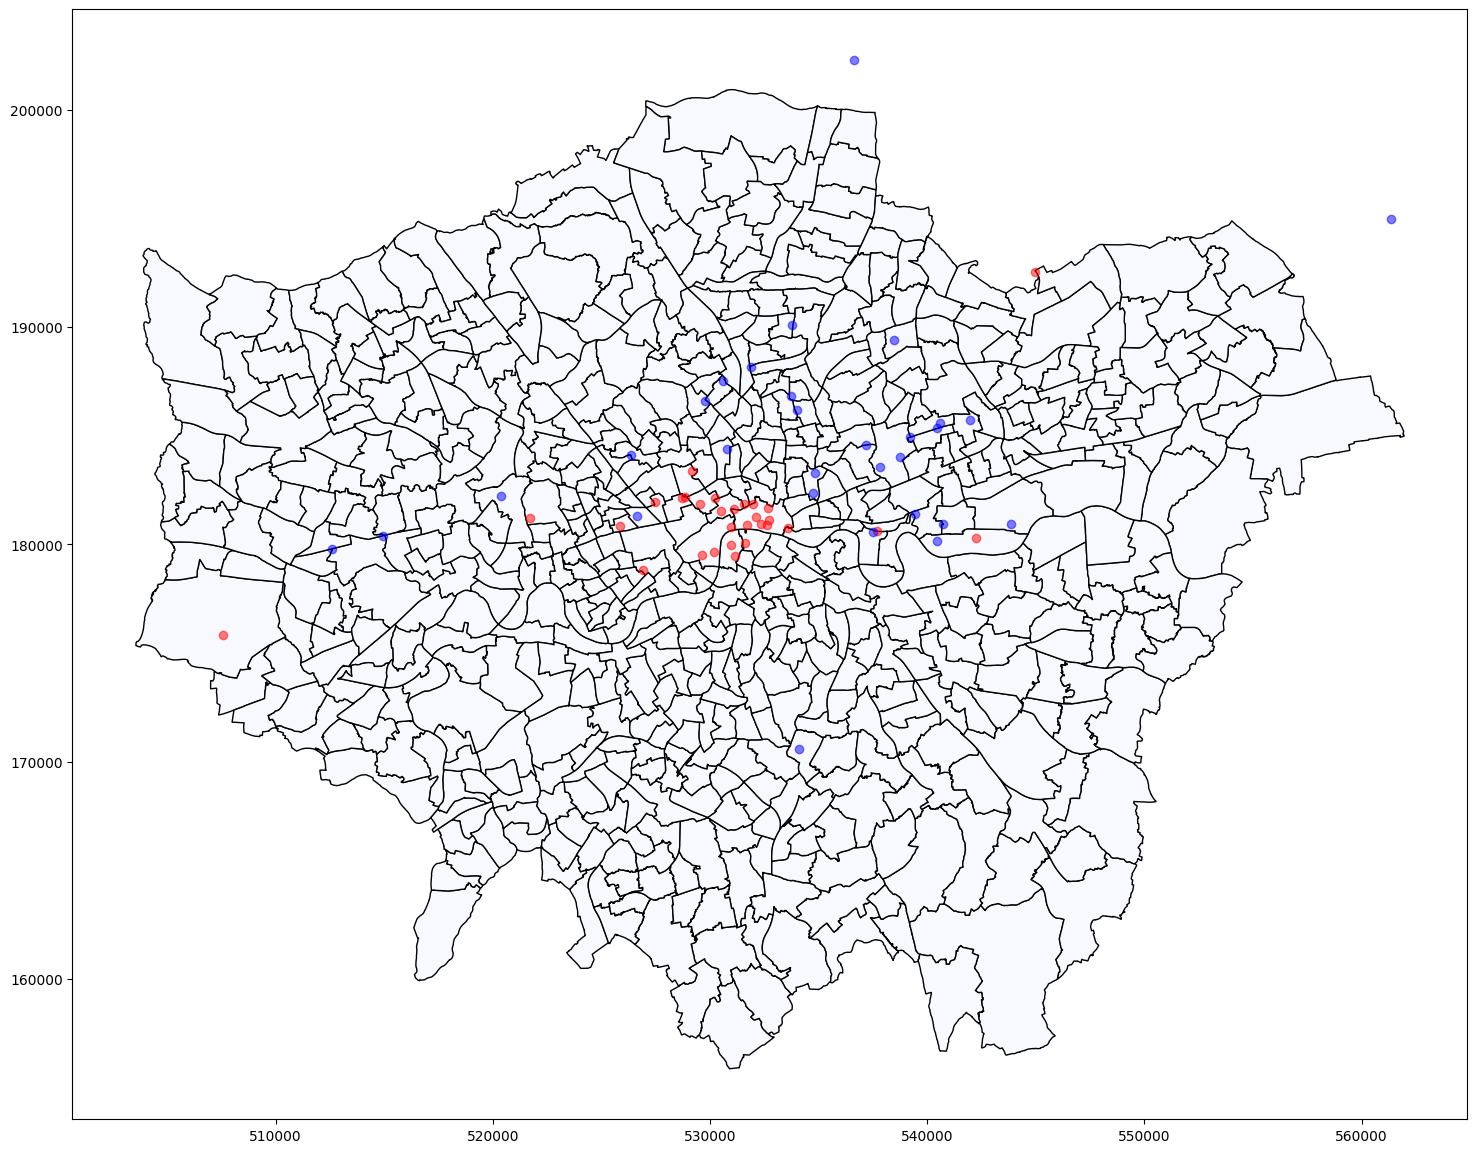

In [465]:
fig, gax = plt.subplots(figsize=(18, 18))
ldn_df.plot(ax=gax, edgecolor="black", color="ghostwhite"); 
gdf_btm30.plot(ax=gax, color='red', alpha = 0.5) # Plotting of the bottom 30 stations by 'Post-Covid impact'
gdf_top30.plot(ax=gax, color='blue', alpha = 0.5) # Plotting of the top 30 stations by 'Post-Covid impact'

In [466]:
# Setting up the link to a Tfl route map I modified to show the individual lines
url = (
    "https://raw.githubusercontent.com/Osakwe1/vis/master/tubecreature/data"
)
tfl_network = f"{url}/tfl_lines.json"
style1 = {'fillColor': '#228B22', 'lineColor': '#228B22'}
style2 = {'fillColor': '#00FFFFFF', 'lineColor': '#00FFFFFF'}
# Setting up map to focus in on London
map = folium.Map(location=[51.55, -0.2], tiles="Stamen Terrain", zoom_start=10)

for i,row in gdf_top30.iterrows():
    # Setup the contents of the popup
    iframe = folium.IFrame(f'{str(row["NAME"])} \n Zone: {str(row["Zone"])} \n Lines: {str(row["LINES"])} \n PCI: {str(row["Post-Covid impact"])}', 
                           width='100px', 
                           height='150px')

    # Initialise the popup using the iframe
    popup = folium.Popup(iframe)
        
    # Add each station to the map
    folium.Marker(location=[row['y'],row['x']],
                  popup = popup, icon=folium.Icon(color='lightblue', icon='')).add_to(map)
    
for i,row in gdf_btm30.iterrows():
    # Setup the contents of the popup
    iframe = folium.IFrame(f'{str(row["NAME"])} Station \n Zone: {str(row["Zone"])} \n Lines: {str(row["LINES"])} \n PCI: {str(row["Post-Covid impact"])}',
                          width='100px',
                          height='150px')
    
    # Initialise the popup using the iframe
    popup = folium.Popup(iframe)
        
    # Add each station to the map
    folium.Marker(location=[row['y'],row['x']],
                  popup = popup, icon=folium.Icon(color='red', icon='')).add_to(map)
    
# Initialise the tfl route map
folium.GeoJson(tfl_network, name="Tube map", style_function=style_function).add_to(map)
# folium.GeoJson(data=ldn_df2["geometry"], name="Inner/Outer London map").add_to(map)

# Create a legend using the tube_lines dictionary
legend_html = """
<div style="position: fixed; 
     bottom: 50px; 
     left: 50px; 
     width: 160px; 
     height: 480px; 
     border: 2px solid grey; 
     z-index:9999; 
     font-size:14px;
     background-color:white;
     ">
     &nbsp; TfL Lines <br>
"""

for line_name, line_info in tube_lines.items():
    legend_html += f"""
     &nbsp; <span style="color:{line_info['colour']}; 
                  font-size: 20px;">&#9679;</span> 
                  {line_name} <br>
    """

legend_html += "</div>"

map.get_root().html.add_child(folium.Element(legend_html))

folium.LayerControl().add_to(map)
     
map

### Observations 🔎

Looking at the bottom 30 stations by Post-Covid Index, we spot a few trends:
- 21 of the 30 stations selected (70%) are within the Zone 1 fare
- Airport terminals Heathrow 2&3 EL, & London City Airport are included in the bottom 30.

For comparison, looking at the top 30 stations by Post-Covid Index:
- Only 1 of the 30 stations selected are within the Zone 1 fare zone, the Paddington NR station which has the newly finished Elizabeth line. 

Also, there is an oddity that I find difficult to explain:
- Poplar and West India Quay are a 3 minute walk apart (as displayed below). Poplar usually ranks among the busiest DLR stations however Poplar ranks ***last*** among all TfL stations by PCI while West India Quay ranks in the top 30. The likely explanation would be a closure of the station but there are seemingly no reports to support this possibility.
Other unlikely explanations were:
    *  West India Quay is near to the Canary Wharf EL station but that station only opened in May 2022 and both Poplar and West India Quay are Out-of-Station Interchanges (OSIs) for the Canary Wharf EL station.
    
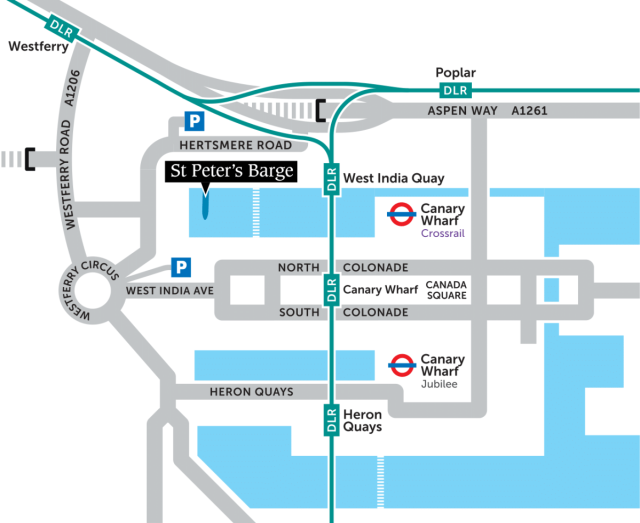

Earlier, we created the upturn and downturn indexes to take a deeper look at recent trends on the TfL network. Now for an even clearer image, we will be plotting the stations in both DFs.

In [467]:
### Creating a Geopandas dataframe of all TfL stations
df_all=pd.merge(df_plot,
                df1,
                on='NLC',   
                how='right').drop(columns=['NETWORK', 'Zone'])
df_all["Coordinates"] = list(zip(df_all.EASTING, df_all.NORTHING))
df_all["Coordinates"] = df_all["Coordinates"].apply(Point)
gdf_all = gpd.GeoDataFrame(df_all, geometry="Coordinates")

# Creating a Geopandas dataframe of the bottom 30 stations by the 'Post-Covid impact' index
df_btm30=pd.merge(df_plot.tail(30),
                  df1,
                  on='NLC',
                  how='left')
df_btm30["Coordinates"] = list(zip(df_btm30.EASTING, df_btm30.NORTHING))
df_btm30["Coordinates"] = df_btm30["Coordinates"].apply(Point)
gdf_btm30 = gpd.GeoDataFrame(df_btm30, geometry="Coordinates")

# Creating a Geopandas dataframe of the top 30 stations by the 'Post-Covid impact' index
df_top30=pd.merge(df_plot.head(30),
                  df1, 
                  on='NLC',
                  how='left').drop(columns=['NETWORK'])
df_top30["Coordinates"] = list(zip(df_top30.EASTING, df_top30.NORTHING))
df_top30["Coordinates"] = df_top30["Coordinates"].apply(Point)
gdf_top30 = gpd.GeoDataFrame(df_top30, geometry="Coordinates")

##### First, I created a simple geoplot using shapefiles

<AxesSubplot:>

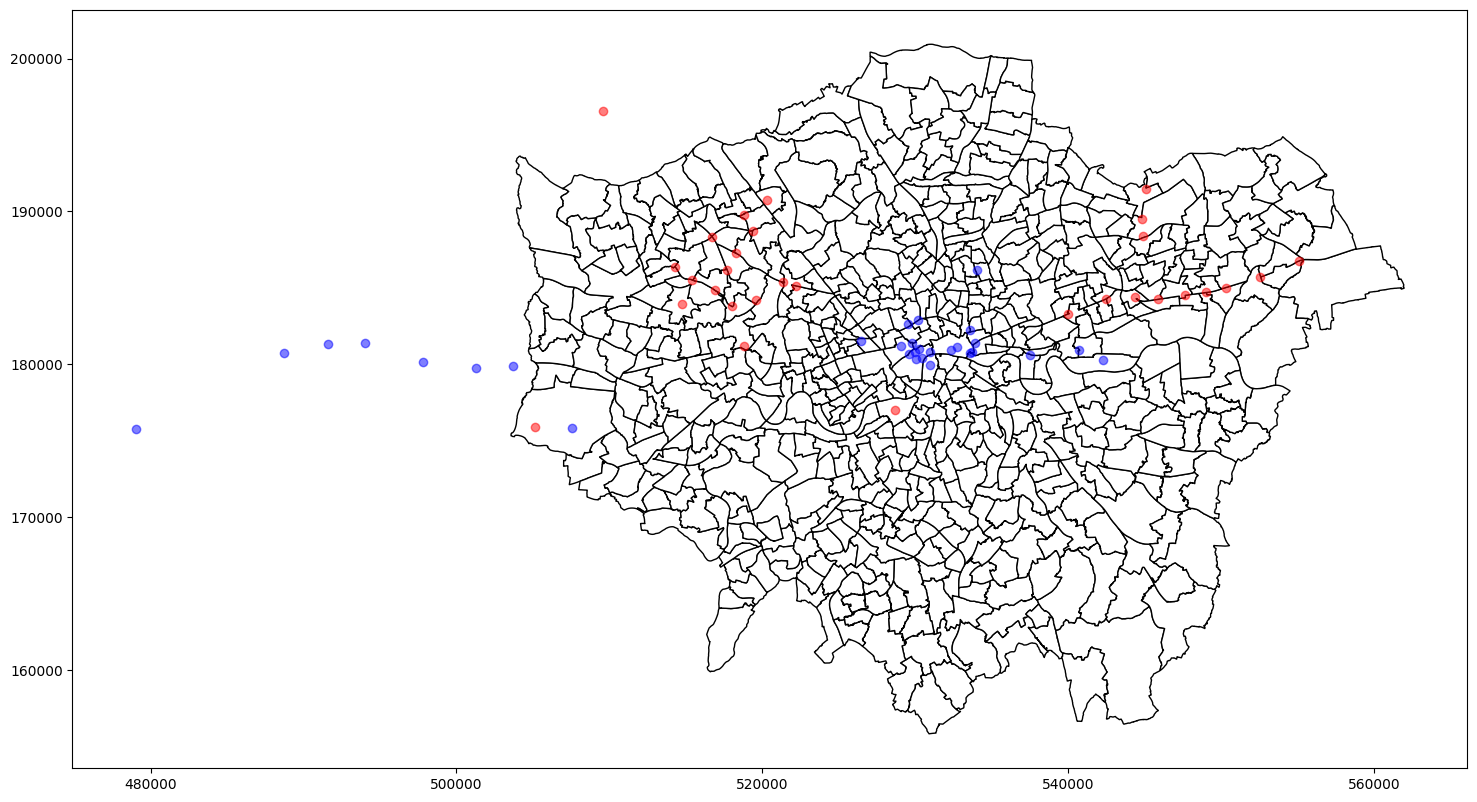

In [468]:
# A plot of the all TfL stations
fig, gax = plt.subplots(figsize=(18, 18))
ldn_df.plot(ax=gax, edgecolor="black", color="white")
gdf_downturn.plot(ax=gax, color='red', alpha = 0.5)
gdf_upturn.plot(ax=gax, color='blue', alpha = 0.5)

##### However, for an interactive and more informative map, I created this plot using Folium and json:

In [469]:
url = (
    "https://raw.githubusercontent.com/Osakwe1/vis/master/tubecreature/data"
)
tfl_network = f"{url}/tfl_lines.json"

map = folium.Map(location=[51.55, -0.25], 
                 tiles="Stamen Terrain", 
                 zoom_start=10)
# folium.GeoJson(data=ldn_df["geometry"]).add_to(map)

for i,row in gdf_downturn.iterrows():
    #Setup the content of the popup

    iframe = folium.IFrame(f'{str(row["NAME"])} \n Zone: {str(row["Zone"])} \n Lines: {str(row["LINES"])} \n Downturn: {str(row["Downturn"])}', 
                           width='100px', 
                           height='150px')

    #Initialise the popup using the iframe
    popup = folium.Popup(iframe)
        
    #Add each row to the map
    folium.Marker(location=[row['y'],row['x']],
                  popup = popup, icon=folium.Icon(color='red', icon='')).add_to(map)
    
for i,row in gdf_upturn.iterrows():
    #Setup the content of the popup
    iframe = folium.IFrame(f'{str(row["NAME"])} Station \n Zone: {str(row["Zone"])} \n Lines: {str(row["LINES"])} \n Upturn: {str(row["Upturn"])}',
                          width='100px',
                          height='150px')
    
    #Initialise the popup using the iframe
    popup = folium.Popup(iframe)
        
    #Add each row to the map
    folium.Marker(location=[row['y'],row['x']],
                  popup = popup, icon=folium.Icon(color='blue', icon='')).add_to(map)
    
folium.GeoJson(tfl_network, name="Tube map", style_function=style_function).add_to(map)
folium.LayerControl().add_to(map)
     
map

In [470]:
print(gdf_top30[gdf_top30['London Underground'] == 'Yes'].shape[0])
print(gdf_top30[gdf_top30['London Overground'] == 'Yes'].shape[0])
print(gdf_top30[gdf_top30['DLR'] == 'Yes'].shape[0])
print(gdf_top30[gdf_top30['Elizabeth Line'] == 'Yes'].shape[0])
print(" ")
print(gdf_btm30[gdf_btm30['London Underground'] == 'Yes'].shape[0])
print(gdf_btm30[gdf_btm30['London Overground'] == 'Yes'].shape[0])
print(gdf_btm30[gdf_btm30['DLR'] == 'Yes'].shape[0])
print(gdf_btm30[gdf_btm30['Elizabeth Line'] == 'Yes'].shape[0])

1
15
7
9
 
28
0
3
1


In [471]:
print(gdf_btm30['Zone'].shape[0])
print(gdf_btm30[gdf_btm30['Zone'] == '1'].shape[0])
print(gdf_btm30[gdf_btm30['Zone'] == '2'].shape[0])
print(" ")
print(gdf_top30[gdf_top30['Zone'] == '1'].shape[0])
print(gdf_top30[gdf_top30['Zone'] == '2'].shape[0])

30
24
3
 
1
9


In [472]:
print(gdf_top30[gdf_top30['London Underground'] == 'Yes'].shape[0])
print(gdf_top30[gdf_top30['London Overground'] == 'Yes'].shape[0])
print(gdf_top30[gdf_top30['DLR'] == 'Yes'].shape[0])
print(gdf_top30[gdf_top30['Elizabeth Line'] == 'Yes'].shape[0])
print(" ")
print(gdf_btm30[gdf_btm30['London Underground'] == 'Yes'].shape[0])
print(gdf_btm30[gdf_btm30['London Overground'] == 'Yes'].shape[0])
print(gdf_btm30[gdf_btm30['DLR'] == 'Yes'].shape[0])
print(gdf_btm30[gdf_btm30['Elizabeth Line'] == 'Yes'].shape[0])

1
15
7
9
 
28
0
3
1



If you're interested in looking even more detailed maps and data on the TfL network, you can check out [Tubecreature](https://tubecreature.com/) by University College London professor, Oliver O'Brien. 


Thank you for your interest in this project! Check out what I'm working on next on [GitHub](https://github.com/Osakwe1)